<a href="https://colab.research.google.com/github/Mwaniki25/Unsupervised_learning_R/blob/main/Kira_R_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning with R, learn the characteristics of customer groups in Kira.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

### b) Defining the Metric for Success

- Perform clustering stating insights drawn from your analysis and visualizations.
- Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 

### c) Understanding the context 
Your findings should help inform the team in formulating the marketing and sales strategies of the brand. 

### d) Recording the Experimental Design

Problem Definition

- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution
- Challenge the Solution
- Follow up Questions

### e) Data Relevance

The dataset for this Independent project can be found here [http://bit.ly/EcommerceCustomersDataset].  

In [1]:
# loading relevant libraries

library(tidyverse)
library(dplyr)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
pkgs <- c("factoextra",  "NbClust")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = Dataset source = http://bit.ly/DiabetesDataSource
# ---
#

library("data.table")

shopping <- fread("http://bit.ly/EcommerceCustomersDataset")



## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
dim(shopping)

[1] 12330    18

In [4]:
# Previewing the top of our dataset
#
head(shopping, 5)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20,0.20,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00,0.10,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20,0.20,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE


In [5]:
# Checking whether each column has an appropriate datatype
#
sapply(shopping, class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"             "character"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
            "character"               "logical"               "logical"

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


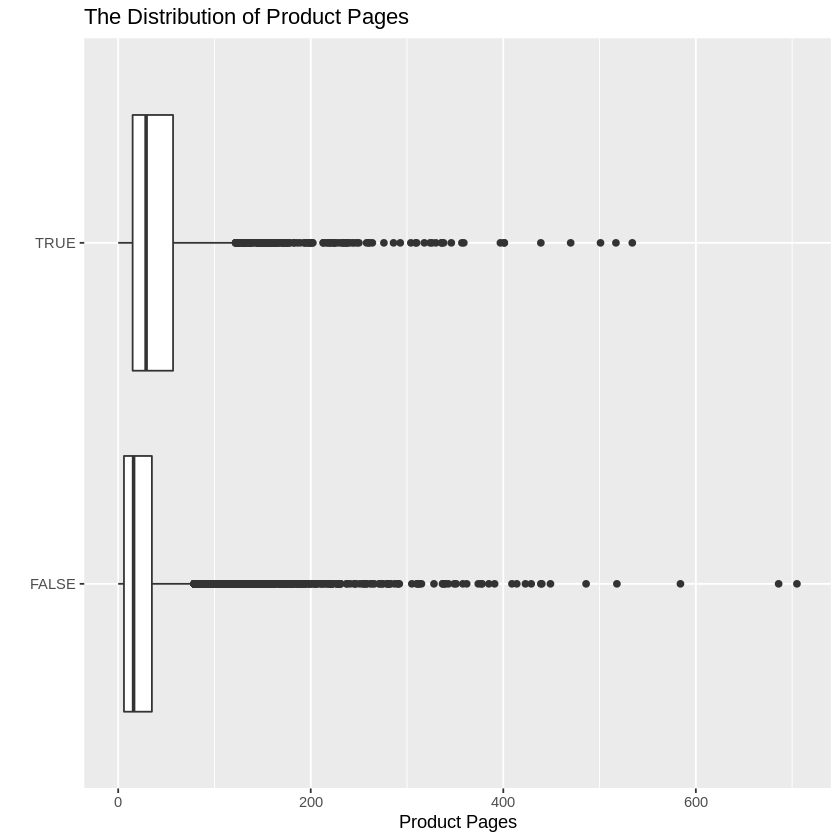

In [9]:
# Checking for Outliers
#
# The distribution of product pages
ggplot(shopping, aes(ProductRelated, Revenue)) + geom_boxplot() +
  ggtitle('The Distribution of Product Pages') + 
  ylab("")+ xlab('Product Pages')

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


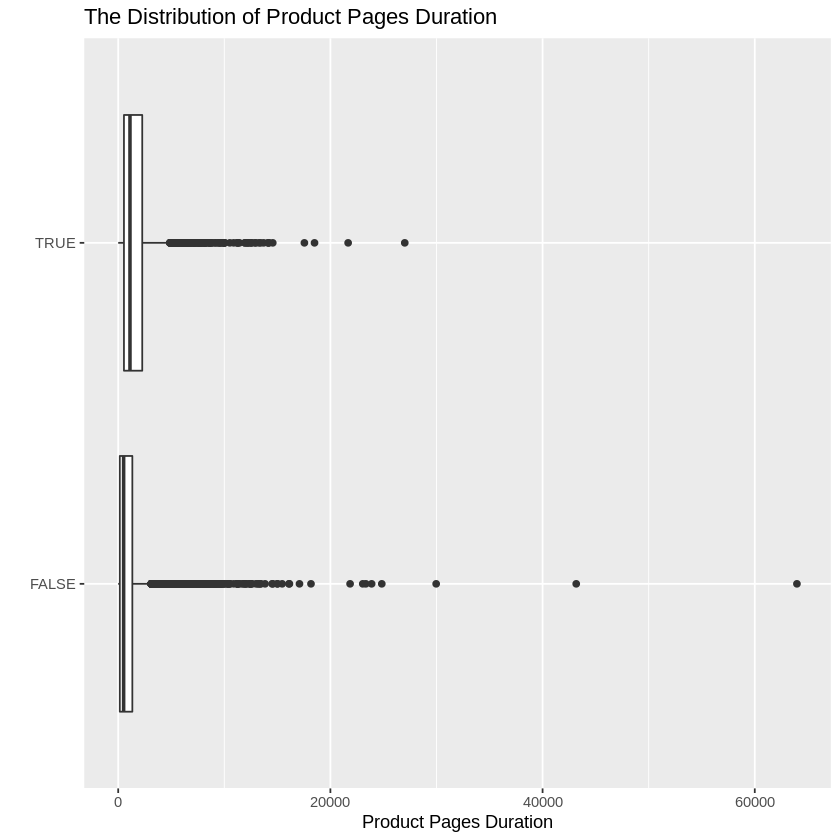

In [10]:
# The distribution of product pages duration
ggplot(shopping, aes(ProductRelated_Duration, Revenue)) + geom_boxplot() +
  ggtitle('The Distribution of Product Pages Duration') + 
  ylab("")+ xlab('Product Pages Duration')

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”


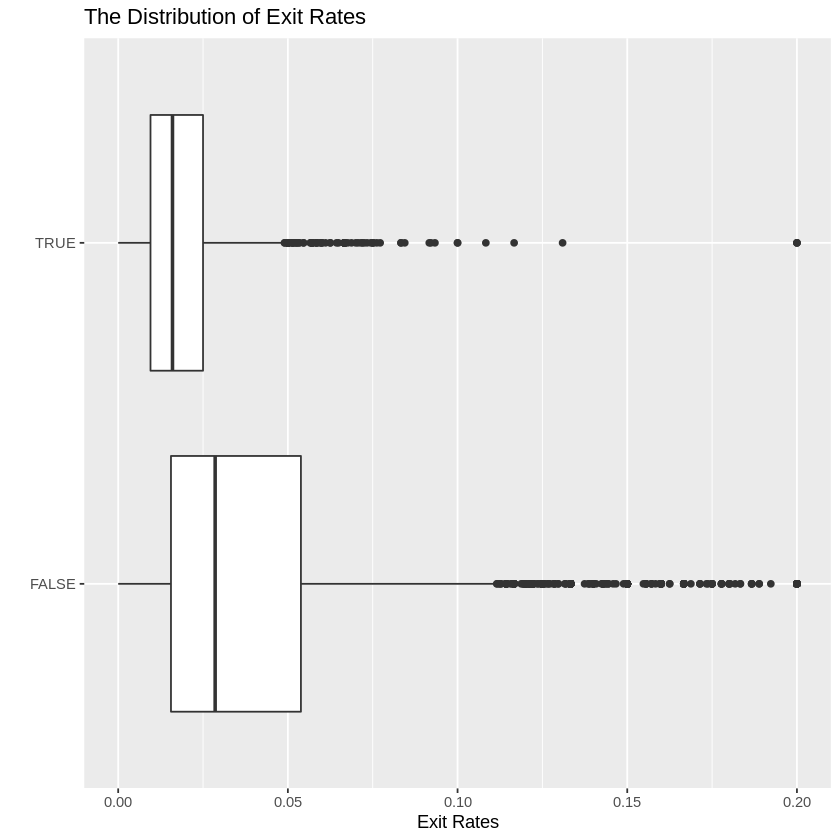

In [12]:
# The distribution of exit rates
ggplot(shopping, aes(ExitRates, Revenue)) + geom_boxplot() +
  ggtitle('The Distribution of Exit Rates') + ylab("")+ xlab('Exit Rates')

In [13]:
# Identifying the Missing Data
#

sum(is.na(shopping))

[1] 112

In [15]:
# Dealing with the Missing Data

shopping = na.omit(shopping)

In [16]:
# Checking for duplicates
#
sum(duplicated(shopping))

[1] 117

In [17]:
#dropping duplicates
shopping = shopping %>% distinct()

In [18]:
# Preview 
head(shopping,2)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE


## 6. Exploratory Analysis

In [20]:
library(gridExtra)
library(grid)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




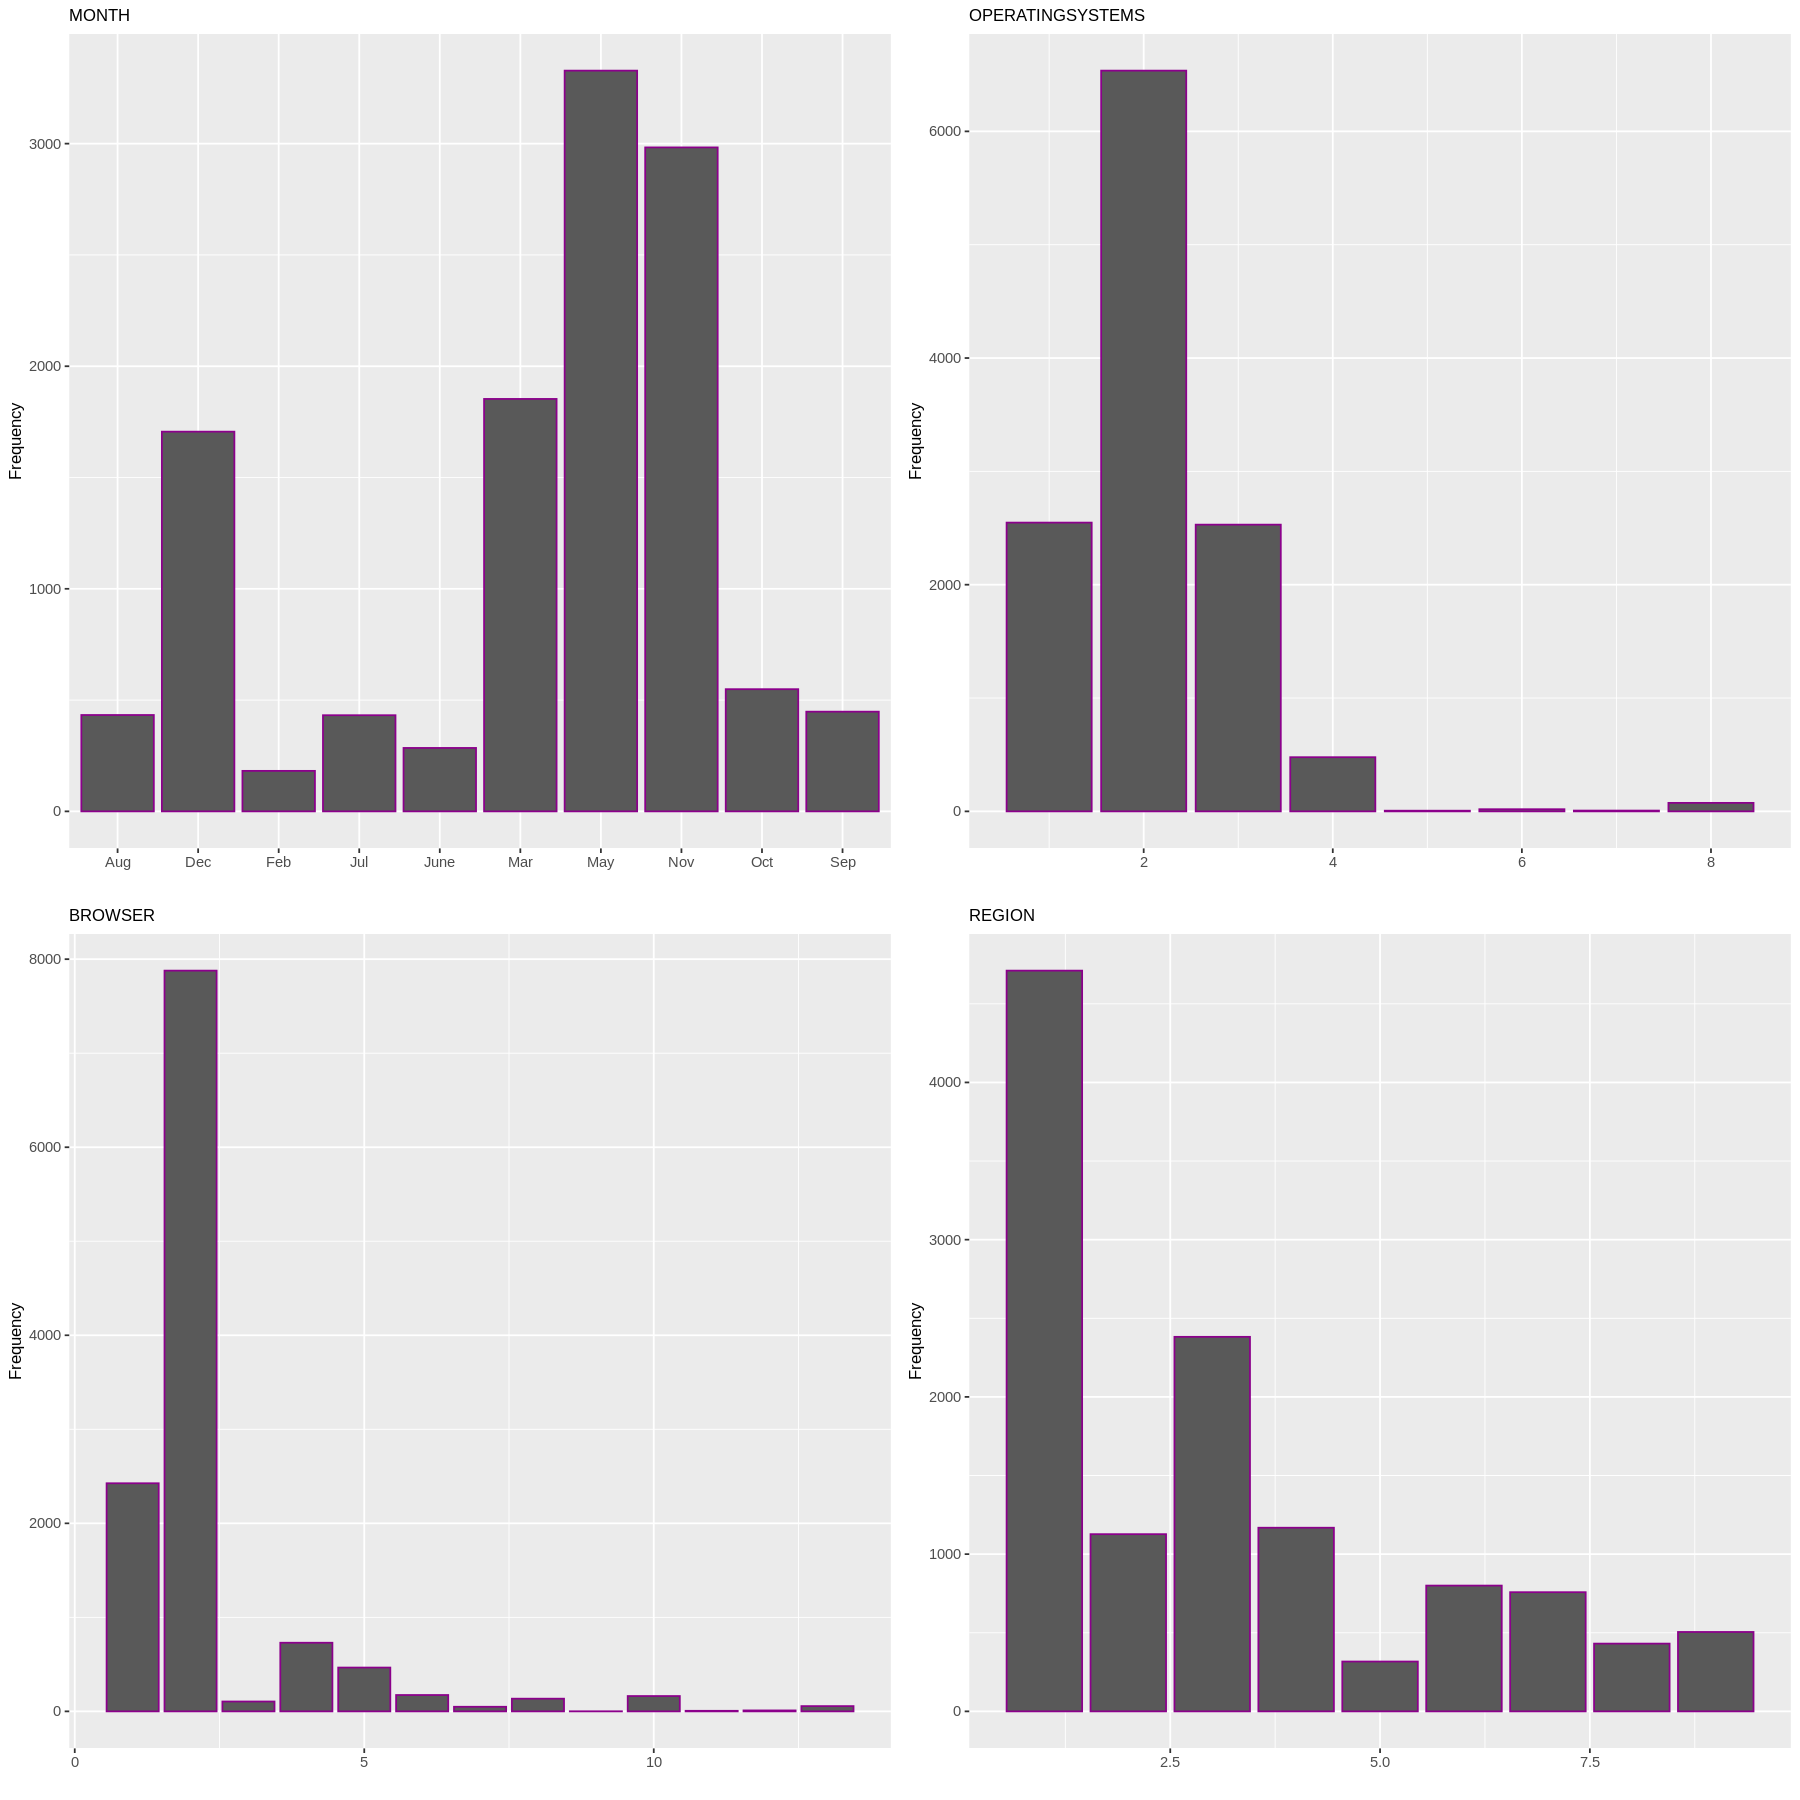

In [21]:
# Ploting the bivariate summaries and recording our observations
#

## histograms
# Plotting histograms
fac_cols = c('Month', 'OperatingSystems',	'Browser',	'Region')

columns = colnames(select(shopping, fac_cols))

p = list()
options(repr.plot.width = 15, repr.plot.height = 15)
for (i in 1:4){
  p[[i]] = ggplot(shopping, aes_string(columns[i])) + geom_bar(color = 'darkmagenta') + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(fac_cols_2)` instead of `fac_cols_2` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



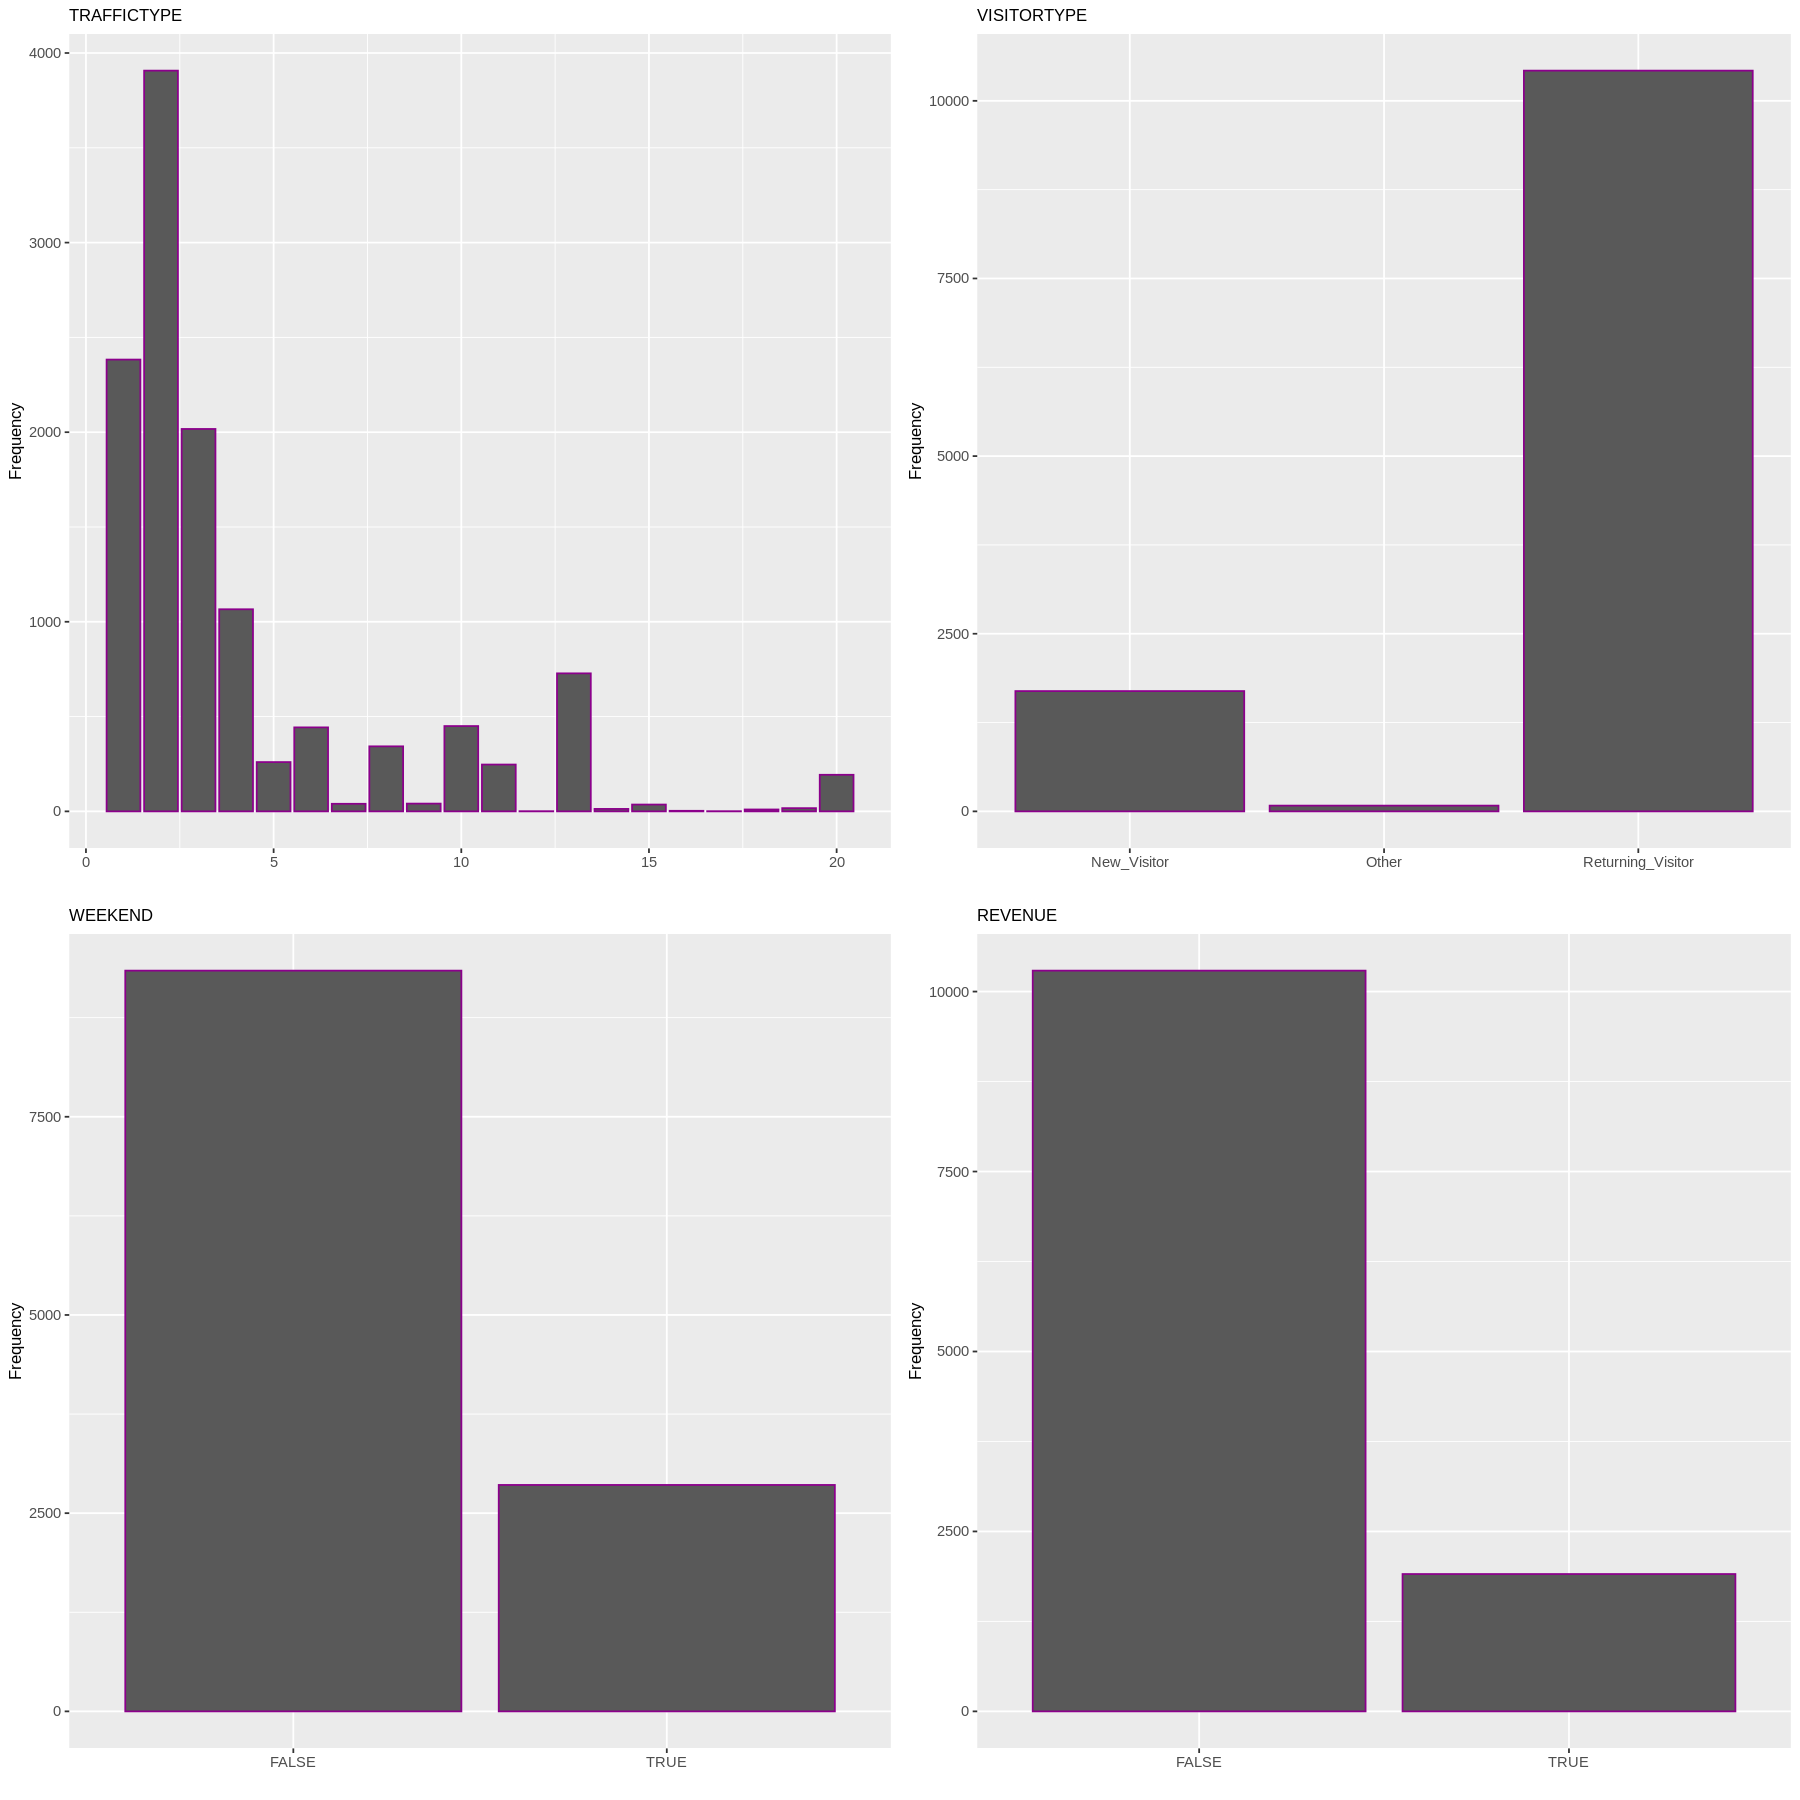

In [22]:

# Plotting histograms
fac_cols_2 = c('TrafficType',	'VisitorType',	'Weekend',	'Revenue')

columns_2 = colnames(select(shopping, fac_cols_2))

p_2 = list()
options(repr.plot.width = 15, repr.plot.height = 15)
for (i in 1:4){
  p_2[[i]] = ggplot(shopping, aes_string(columns_2[i])) + geom_bar(color = 'darkmagenta') + labs(y = 'Frequency', x = '', title = toupper(columns_2[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p_2)

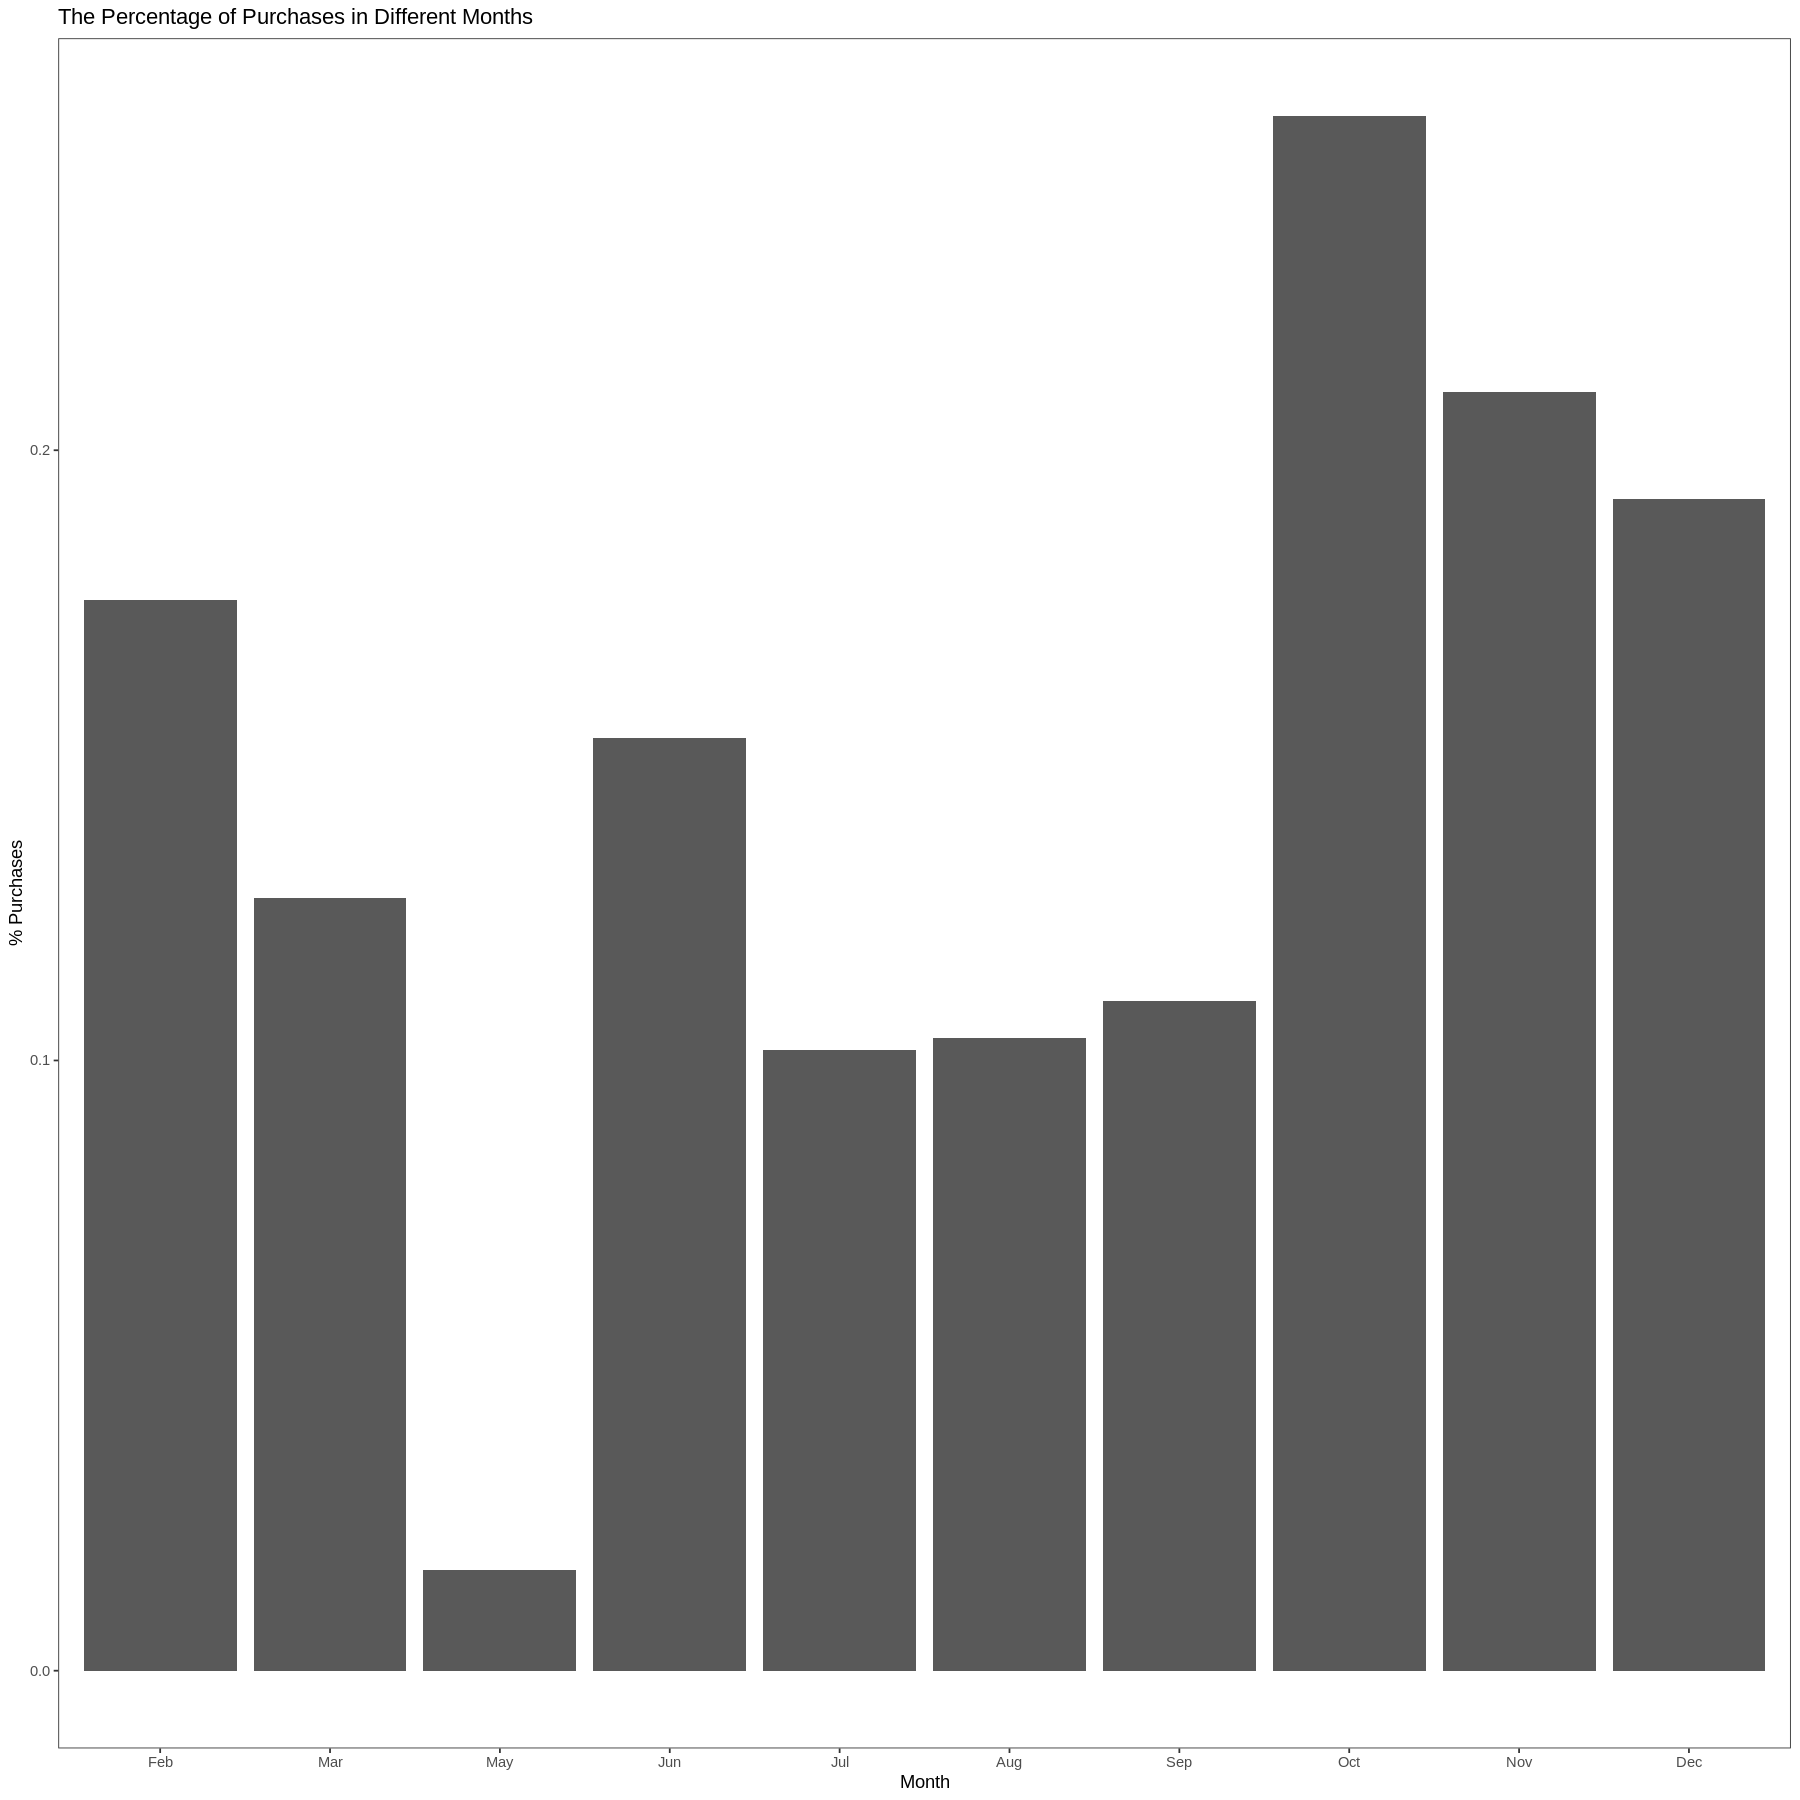

In [23]:
# Calculate % purchases in each month
month_rev <- shopping %>% group_by(Month) %>% 
  summarize(Purchase = sum(Revenue==1)/length(Revenue))

months <- c('Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')

ggplot(month_rev, aes(Month, Purchase)) + 
  geom_bar(stat = "identity") +
  ggtitle('The Percentage of Purchases in Different Months') +
  ylab('% Purchases') +
  theme_bw() + theme(panel.grid.major=element_blank(), panel.grid.minor=element_blank()) +
  scale_x_discrete(labels = months)

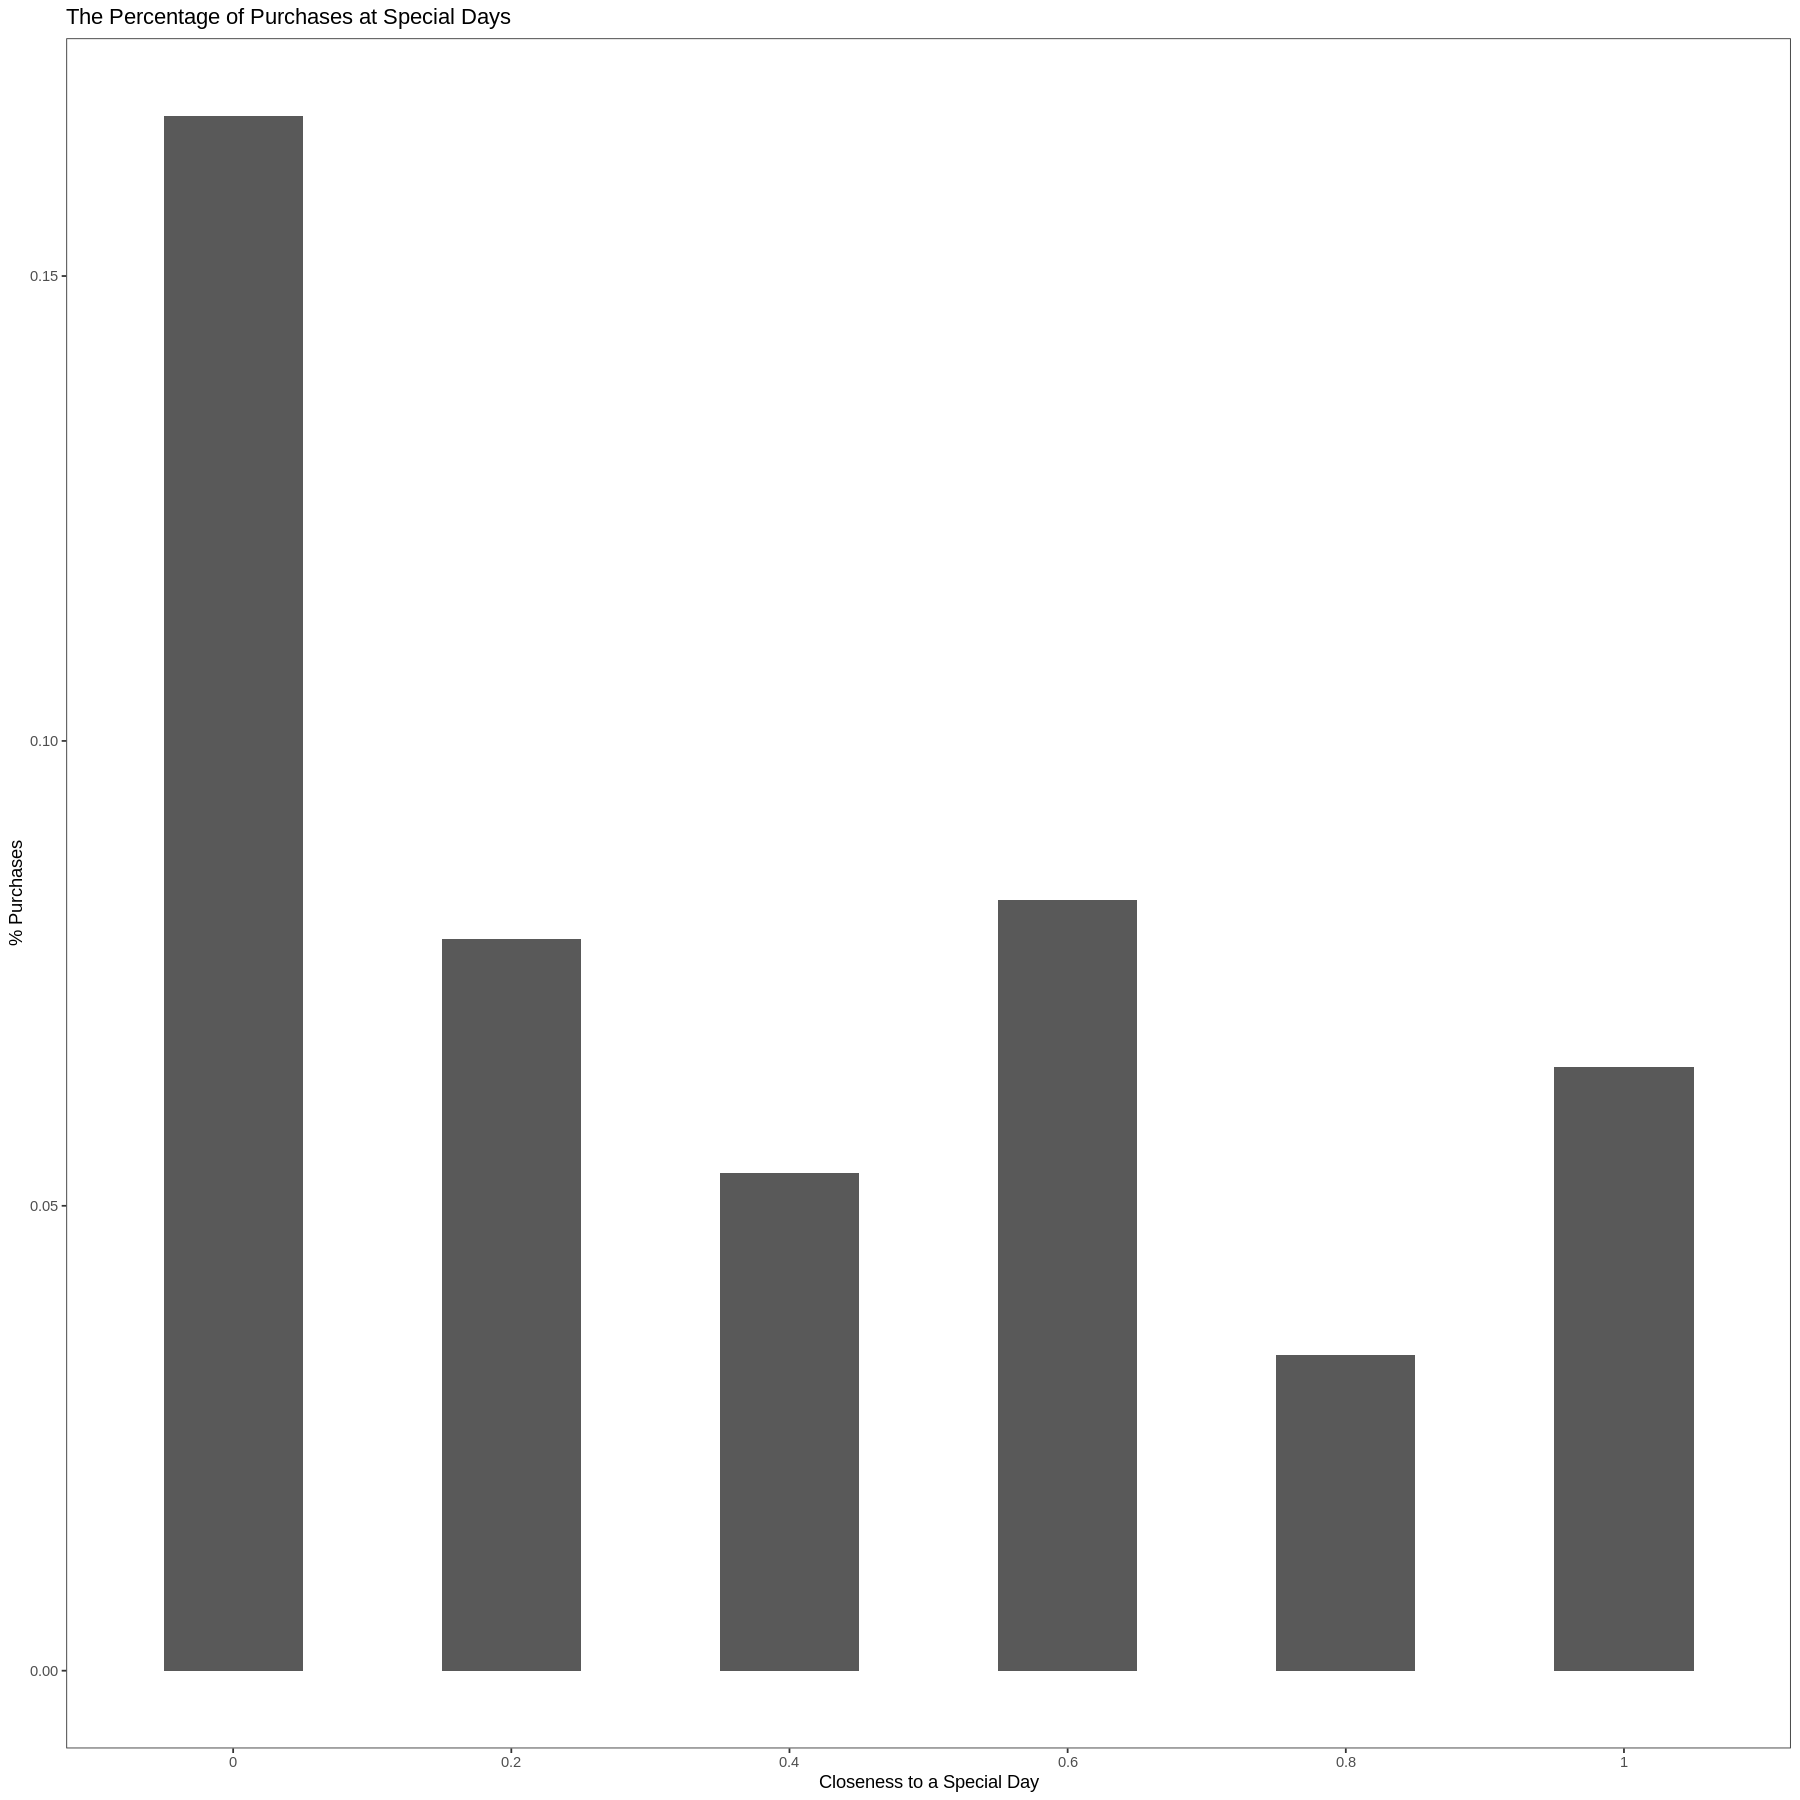

In [24]:
# Calculate % purchases at special days
special_rev <- shopping %>% group_by(SpecialDay) %>% 
  summarize(Purchase = sum(Revenue==1)/length(Revenue))

ggplot(special_rev, aes(factor(SpecialDay), Purchase)) + 
  geom_bar(stat = "identity", width = 0.5) +
  ggtitle('The Percentage of Purchases at Special Days') +
  ylab('% Purchases') + xlab('Closeness to a Special Day') + 
  theme_bw() + theme(panel.grid.major=element_blank(), panel.grid.minor=element_blank())

In [64]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



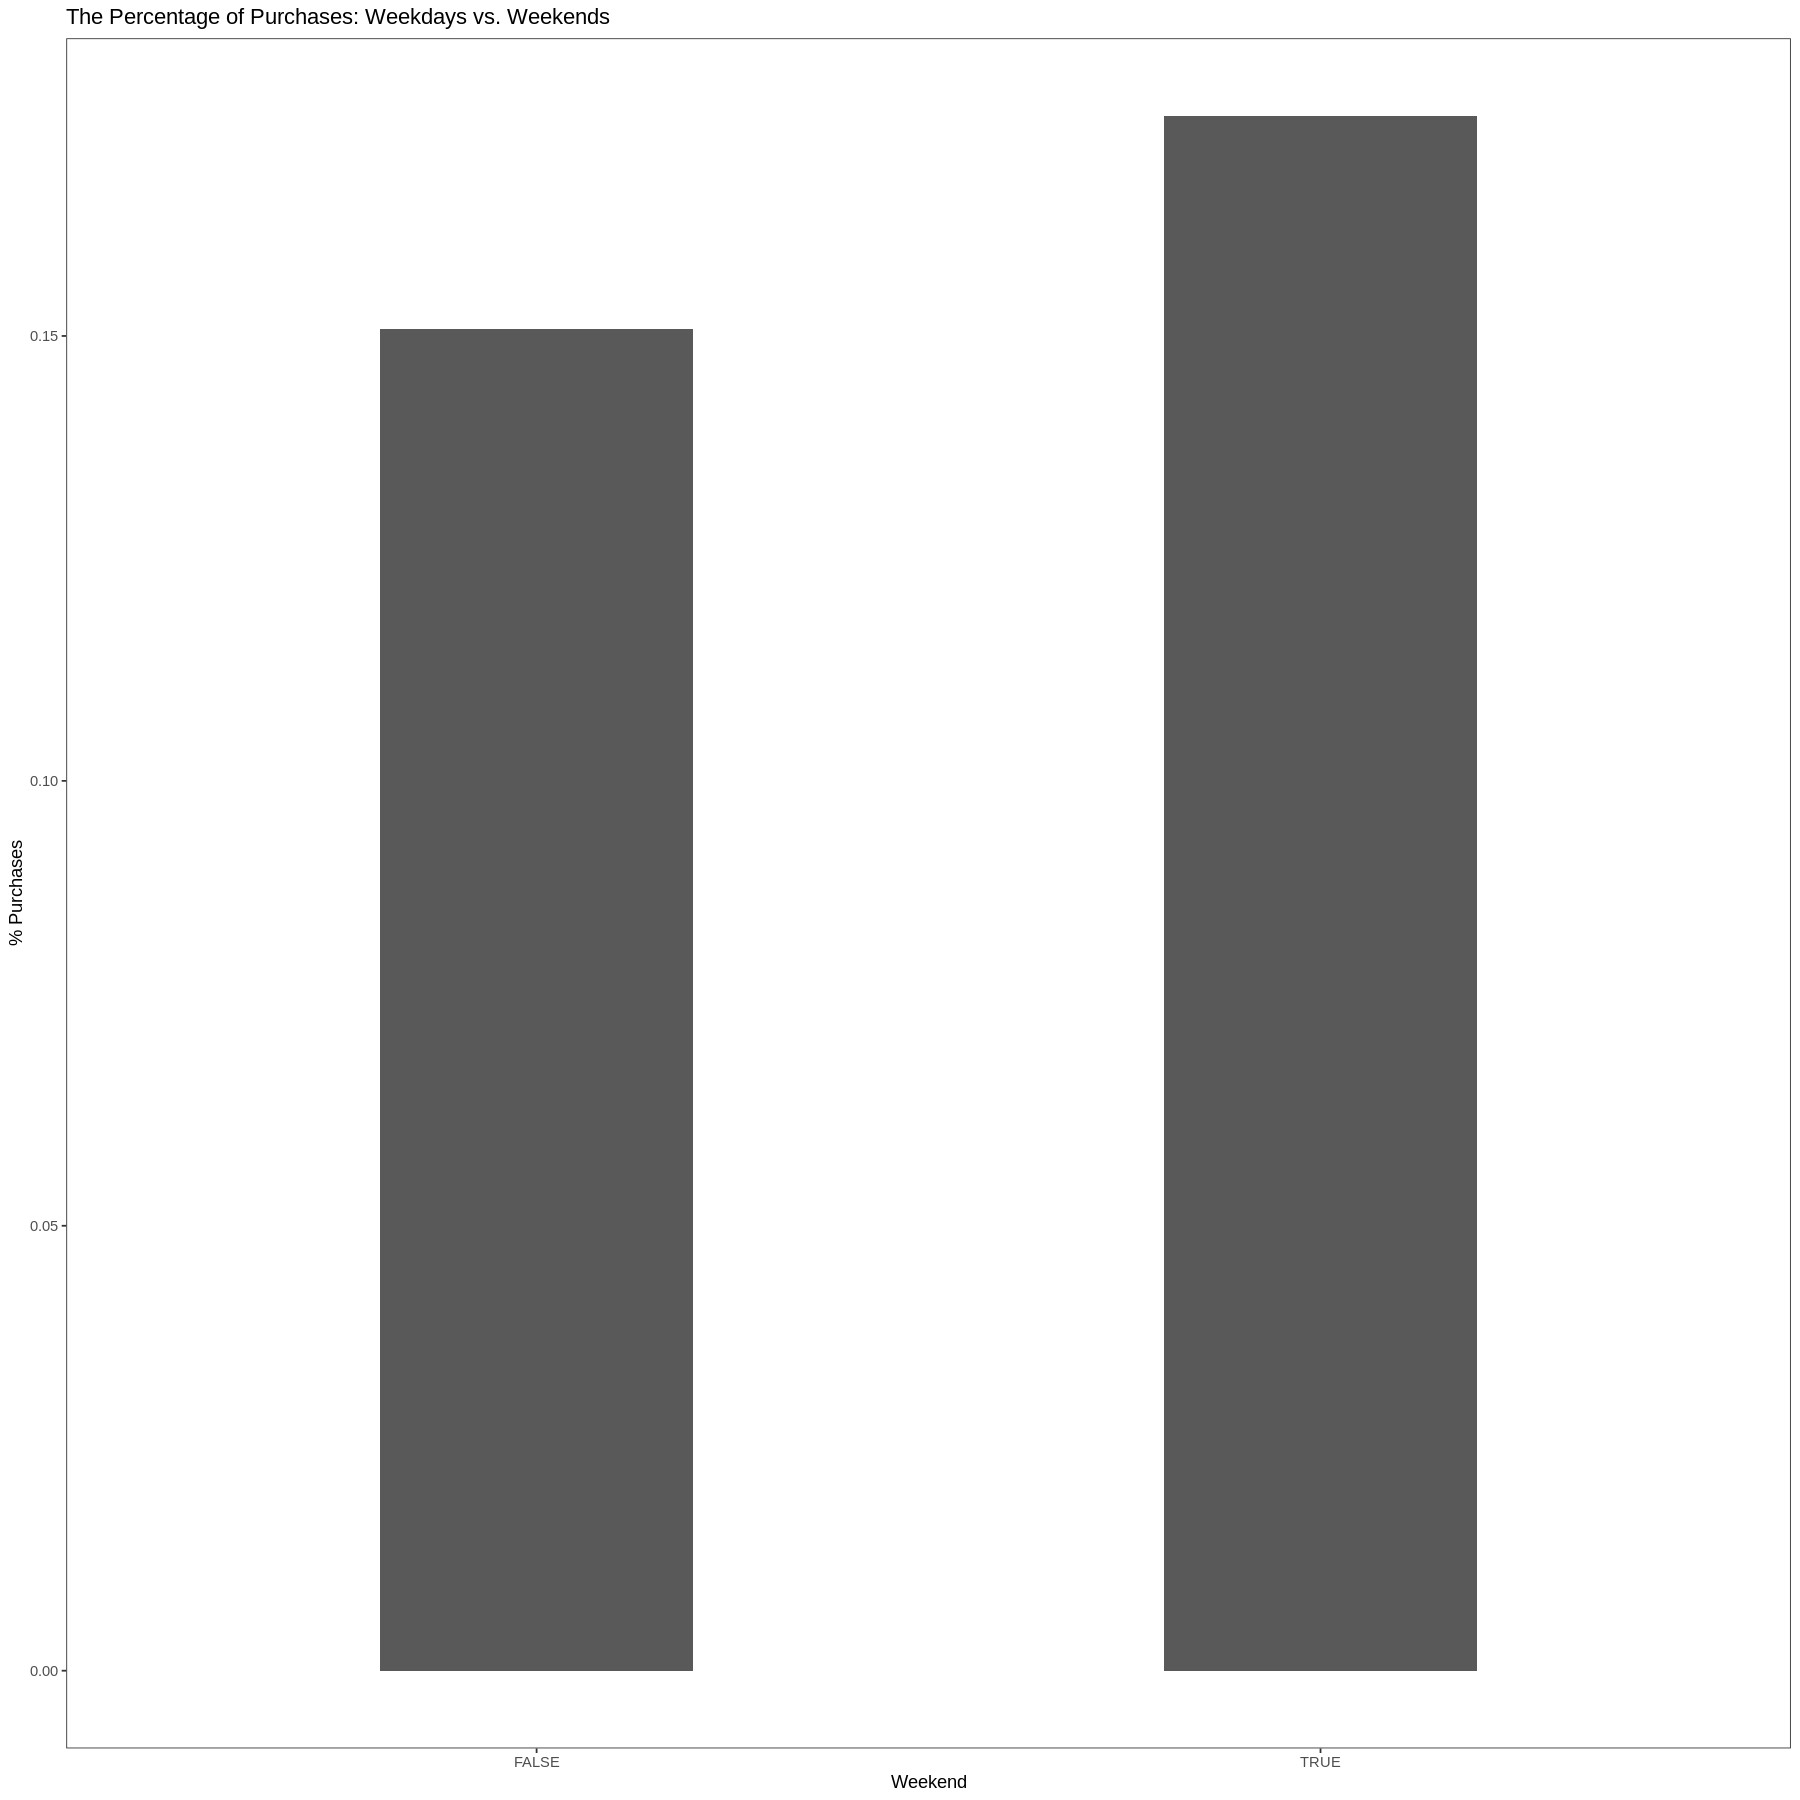

In [26]:
# Calculate % purchases for weekends
weekend_rev <- shopping %>% group_by(Weekend) %>% 
  summarize(Purchase = sum(Revenue==1)/length(Revenue))

ggplot(weekend_rev, aes(Weekend, Purchase)) + 
  geom_bar(stat = "identity", width = 0.4) +
  ggtitle('The Percentage of Purchases: Weekdays vs. Weekends') +
  ylab('% Purchases') + xlab('Weekend') + 
  theme_bw() + theme(panel.grid.major=element_blank(), panel.grid.minor=element_blank())

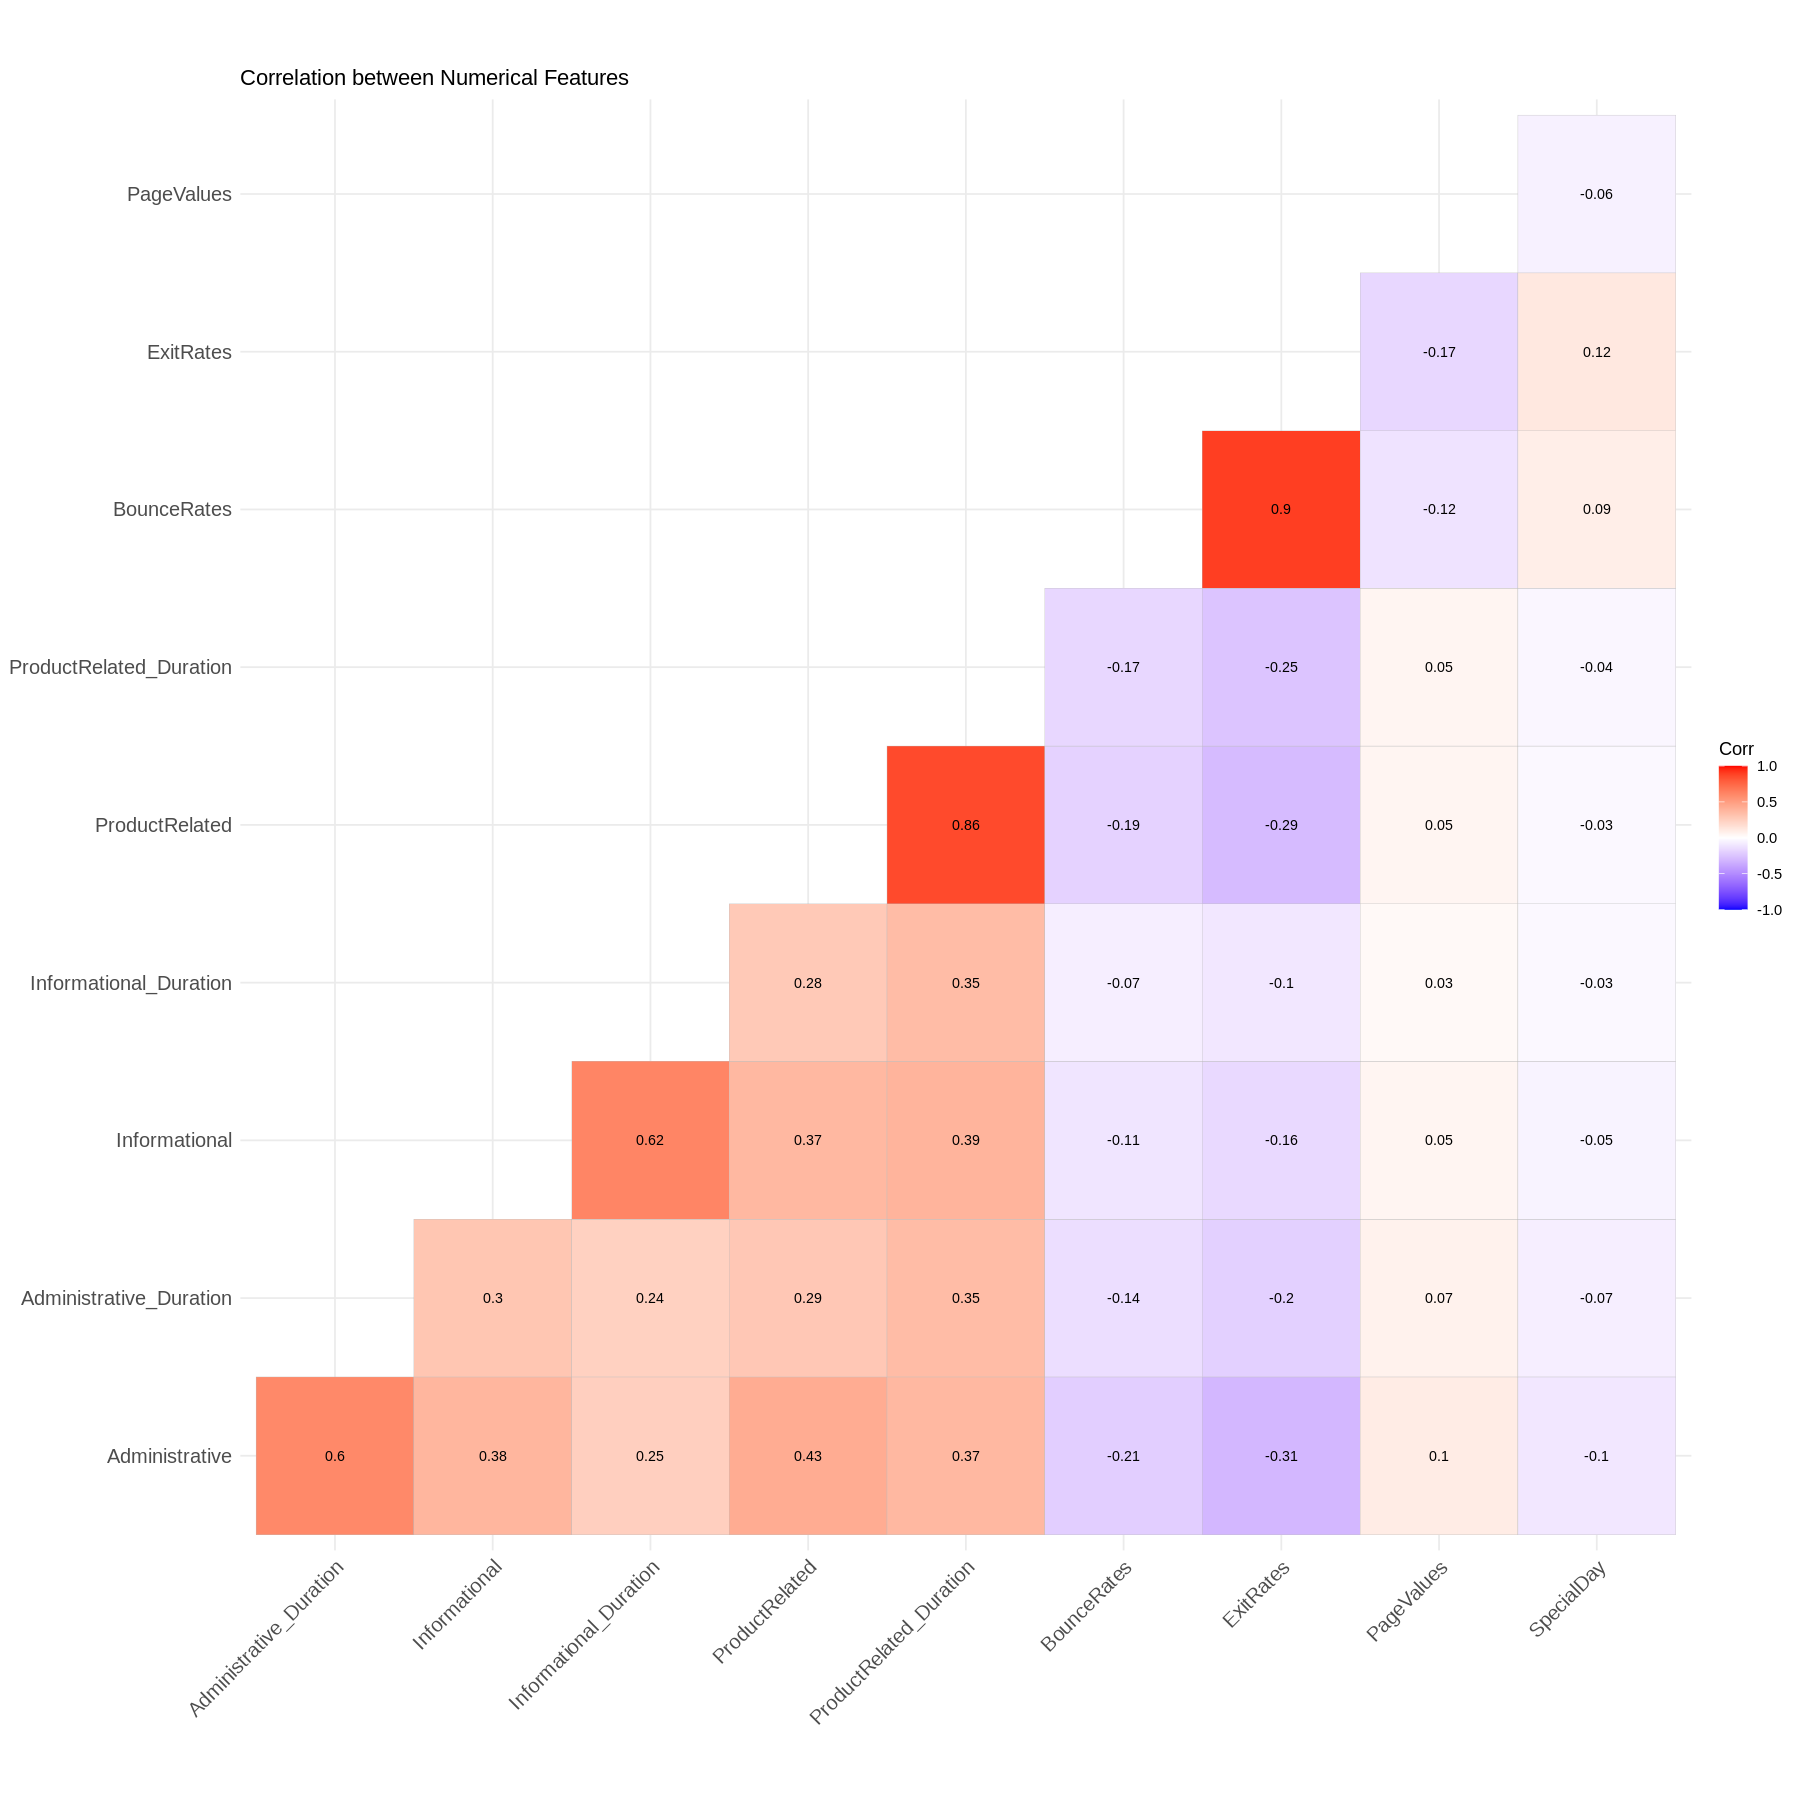

In [65]:
library(ggcorrplot)
ggcorrplot(cor(shopping[,1:10]), type="lower", lab = TRUE, lab_size = 3) + 
  ggtitle("Correlation between Numerical Features")

## 7. Implementing the Solution

In [28]:
# Implementing the Solution
# 
#factor variables changed to its correct class 
shopping$OperatingSystems=as.factor(shopping$OperatingSystems)
shopping$Browser=as.factor(shopping$Browser)
shopping$Region=as.factor(shopping$Region)
shopping$Weekend=as.factor(shopping$Weekend)
shopping$Revenue=as.factor(shopping$Revenue)
shopping$TrafficType=as.factor(shopping$TrafficType)
shopping$VisitorType=as.factor(shopping$VisitorType)
shopping$Month=as.factor(shopping$Month)

In [29]:
summary(shopping)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

In [30]:
# Checking our column names 
data.frame(colnames(shopping))

colnames.shopping.
<chr>
Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues


Creating Appropriate Dummy Variables


In [31]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’




In [32]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [33]:
# dummyVars() function to create a full set of dummy variables.
# The dummyVars() method works on the categorical variables. 
# It is to be noted that the second line contains the argument fullrank=T, 
# which will create n-1 columns for a categorical variable with n unique levels

dmy <- dummyVars(" ~ .", data = shopping, fullRank = T)
shopping_transformed <- data.frame(predict(dmy, newdata = shopping))

glimpse(shopping_transformed)

Rows: 12,199
Columns: 69
$ Administrative                <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ Administrative_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ Informational                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration        <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ ProductRelated                <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7…
$ ProductRelated_Duration       <dbl> 0.000000, 64.000000, -1.000000, 2.666667…
$ BounceRates                   <dbl> 0.200000000, 0.000000000, 0.200000000, 0…
$ ExitRates                     <dbl> 0.200000000, 0.100000000, 0.200000000, 0…
$ PageValues                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay                    <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, …
$ Month.Dec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Month.Feb                     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Month.Jul    

In [34]:
# Scaling our new data
shopping_transformed=shopping_transformed[complete.cases(shopping_transformed),]
shopping_transformed <-scale(shopping_transformed)
summary(shopping_transformed)


 Administrative    Administrative_Duration Informational    
 Min.   :-0.7025   Min.   :-0.46574        Min.   :-0.3988  
 1st Qu.:-0.7025   1st Qu.:-0.46011        1st Qu.:-0.3988  
 Median :-0.4023   Median :-0.40941        Median :-0.3988  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.4984   3rd Qu.: 0.07361        3rd Qu.:-0.3988  
 Max.   : 7.4035   Max.   :18.68474        Max.   :18.4127  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2533        Min.   :-0.7188   Min.   :-0.6295        
 1st Qu.:-0.2463        1st Qu.:-0.5394   1st Qu.:-0.5281        
 Median :-0.2463        Median :-0.3152   Median :-0.3115        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2463        3rd Qu.: 0.1332   3rd Qu.: 0.1407        
 Max.   :17.7758        Max.   :15.0881   Max.   :32.6919        
  BounceRates         ExitRates         PageValues       SpecialDay     
 Min.   :-0.45034   Min.   :-0.8973   

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



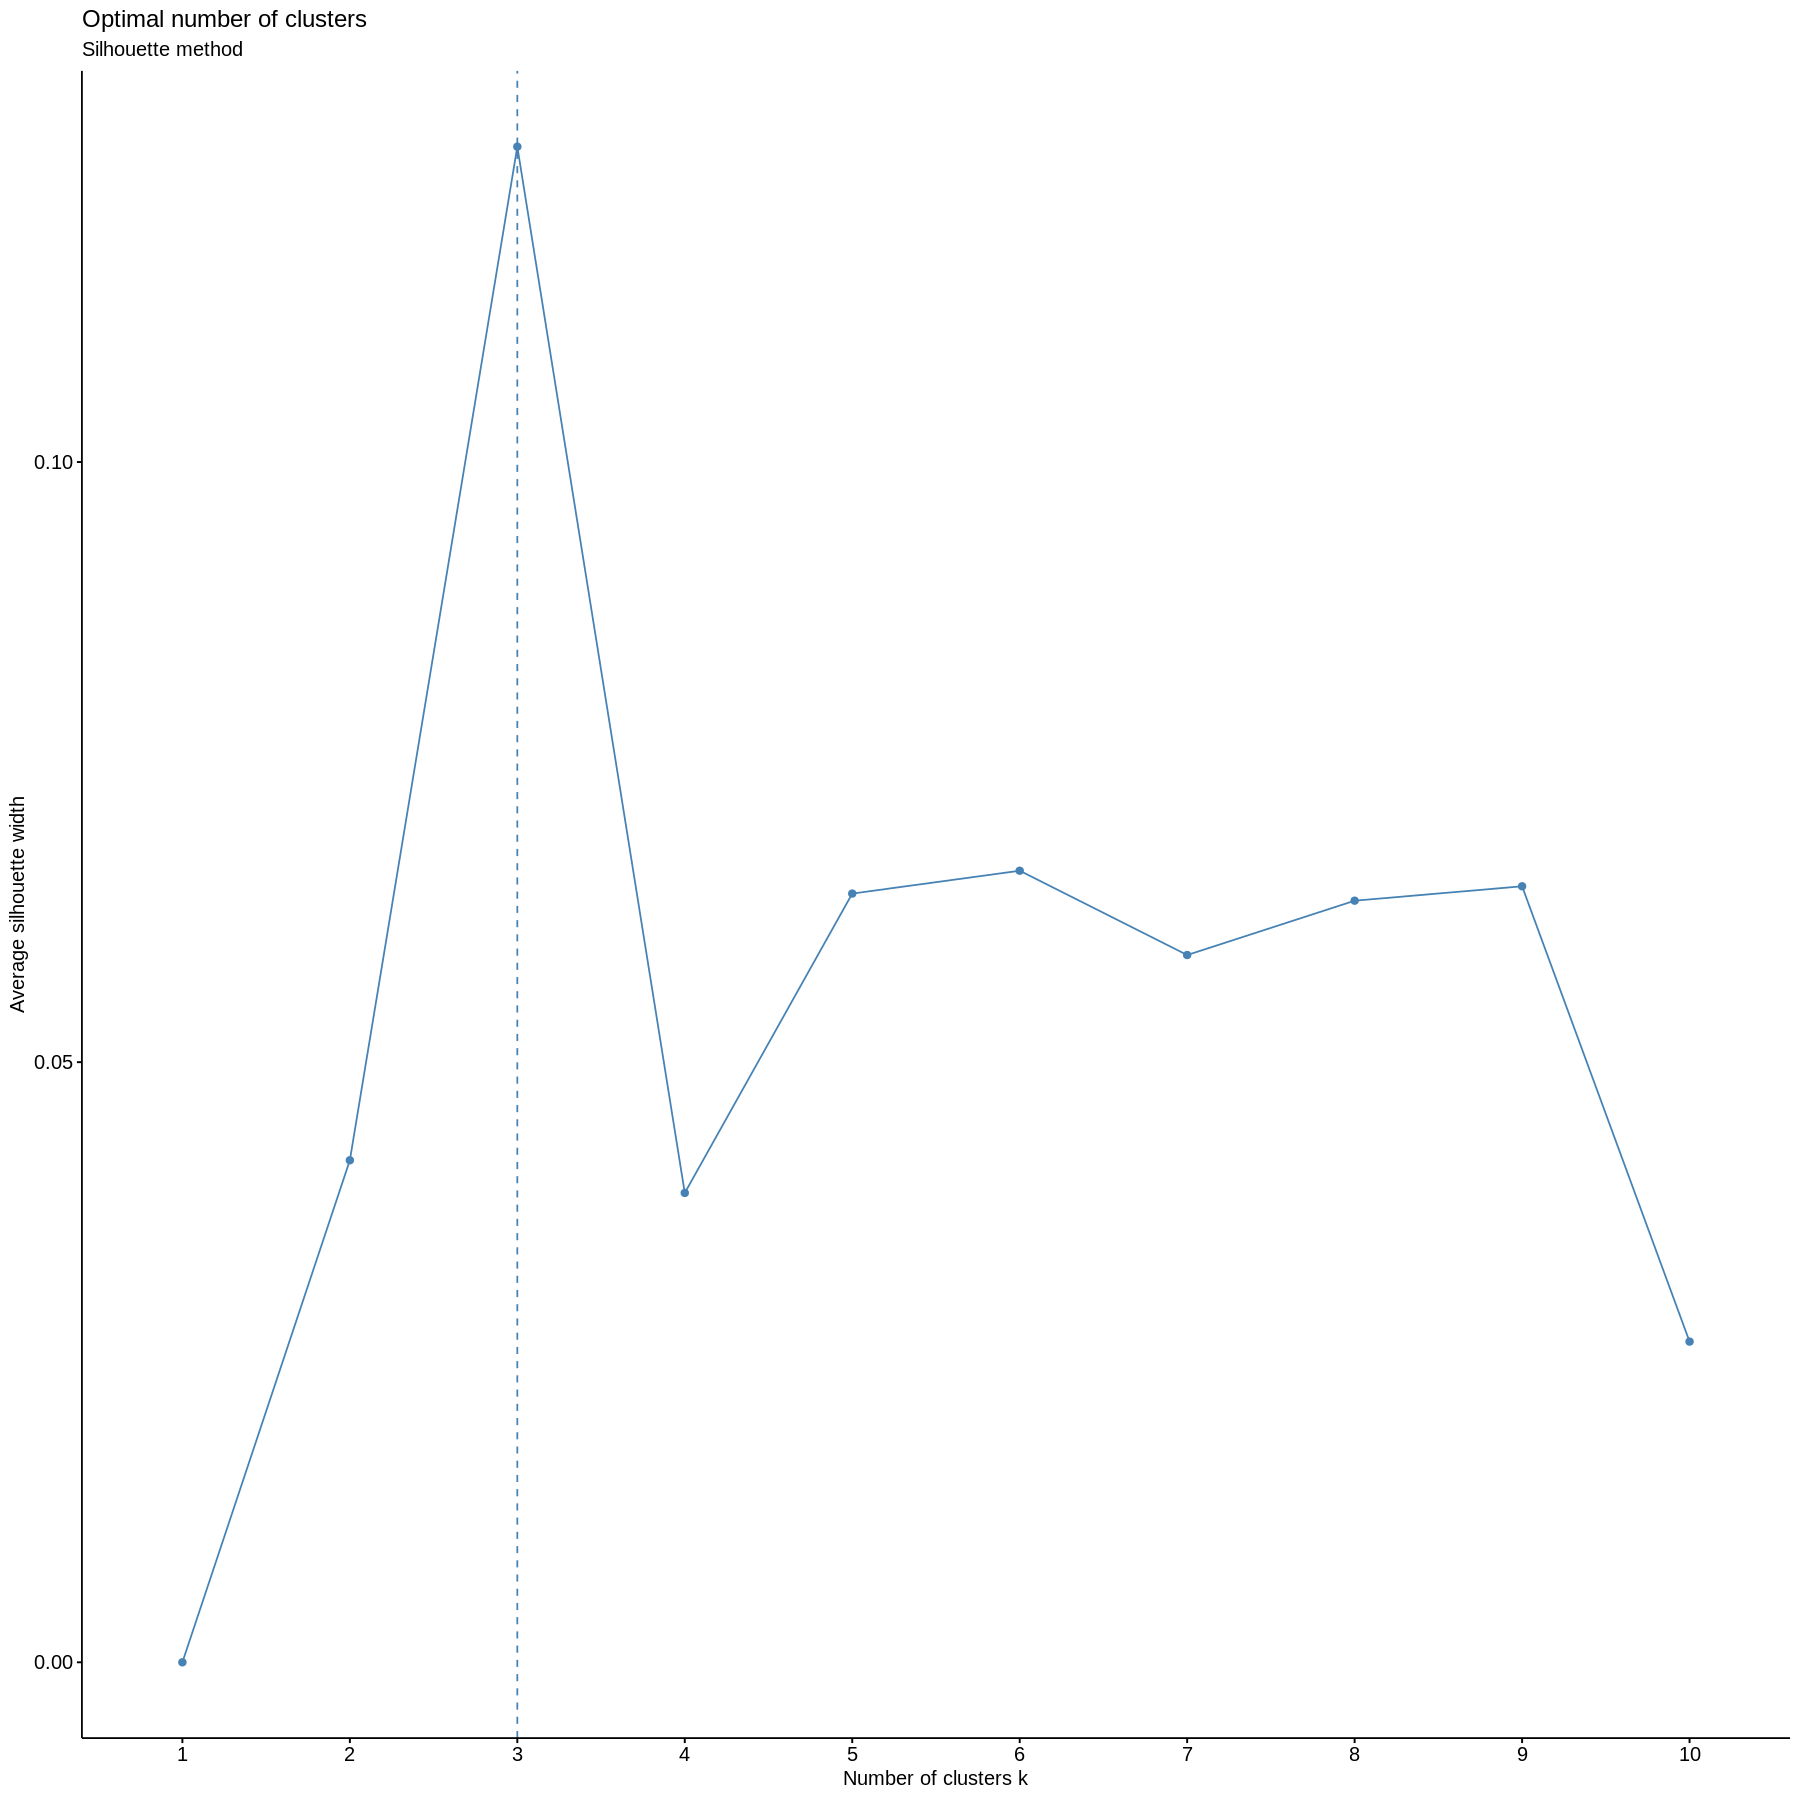

In [35]:
# Silhouette method
# Checking for optimum number of clusters
library(NbClust)
library(factoextra)
fviz_nbclust(shopping_transformed, kmeans, method = "silhouette") +
  labs(subtitle = "Silhouette method")

In [58]:
# Kmeans cluster
KM1 = kmeans(shopping_transformed, 3)

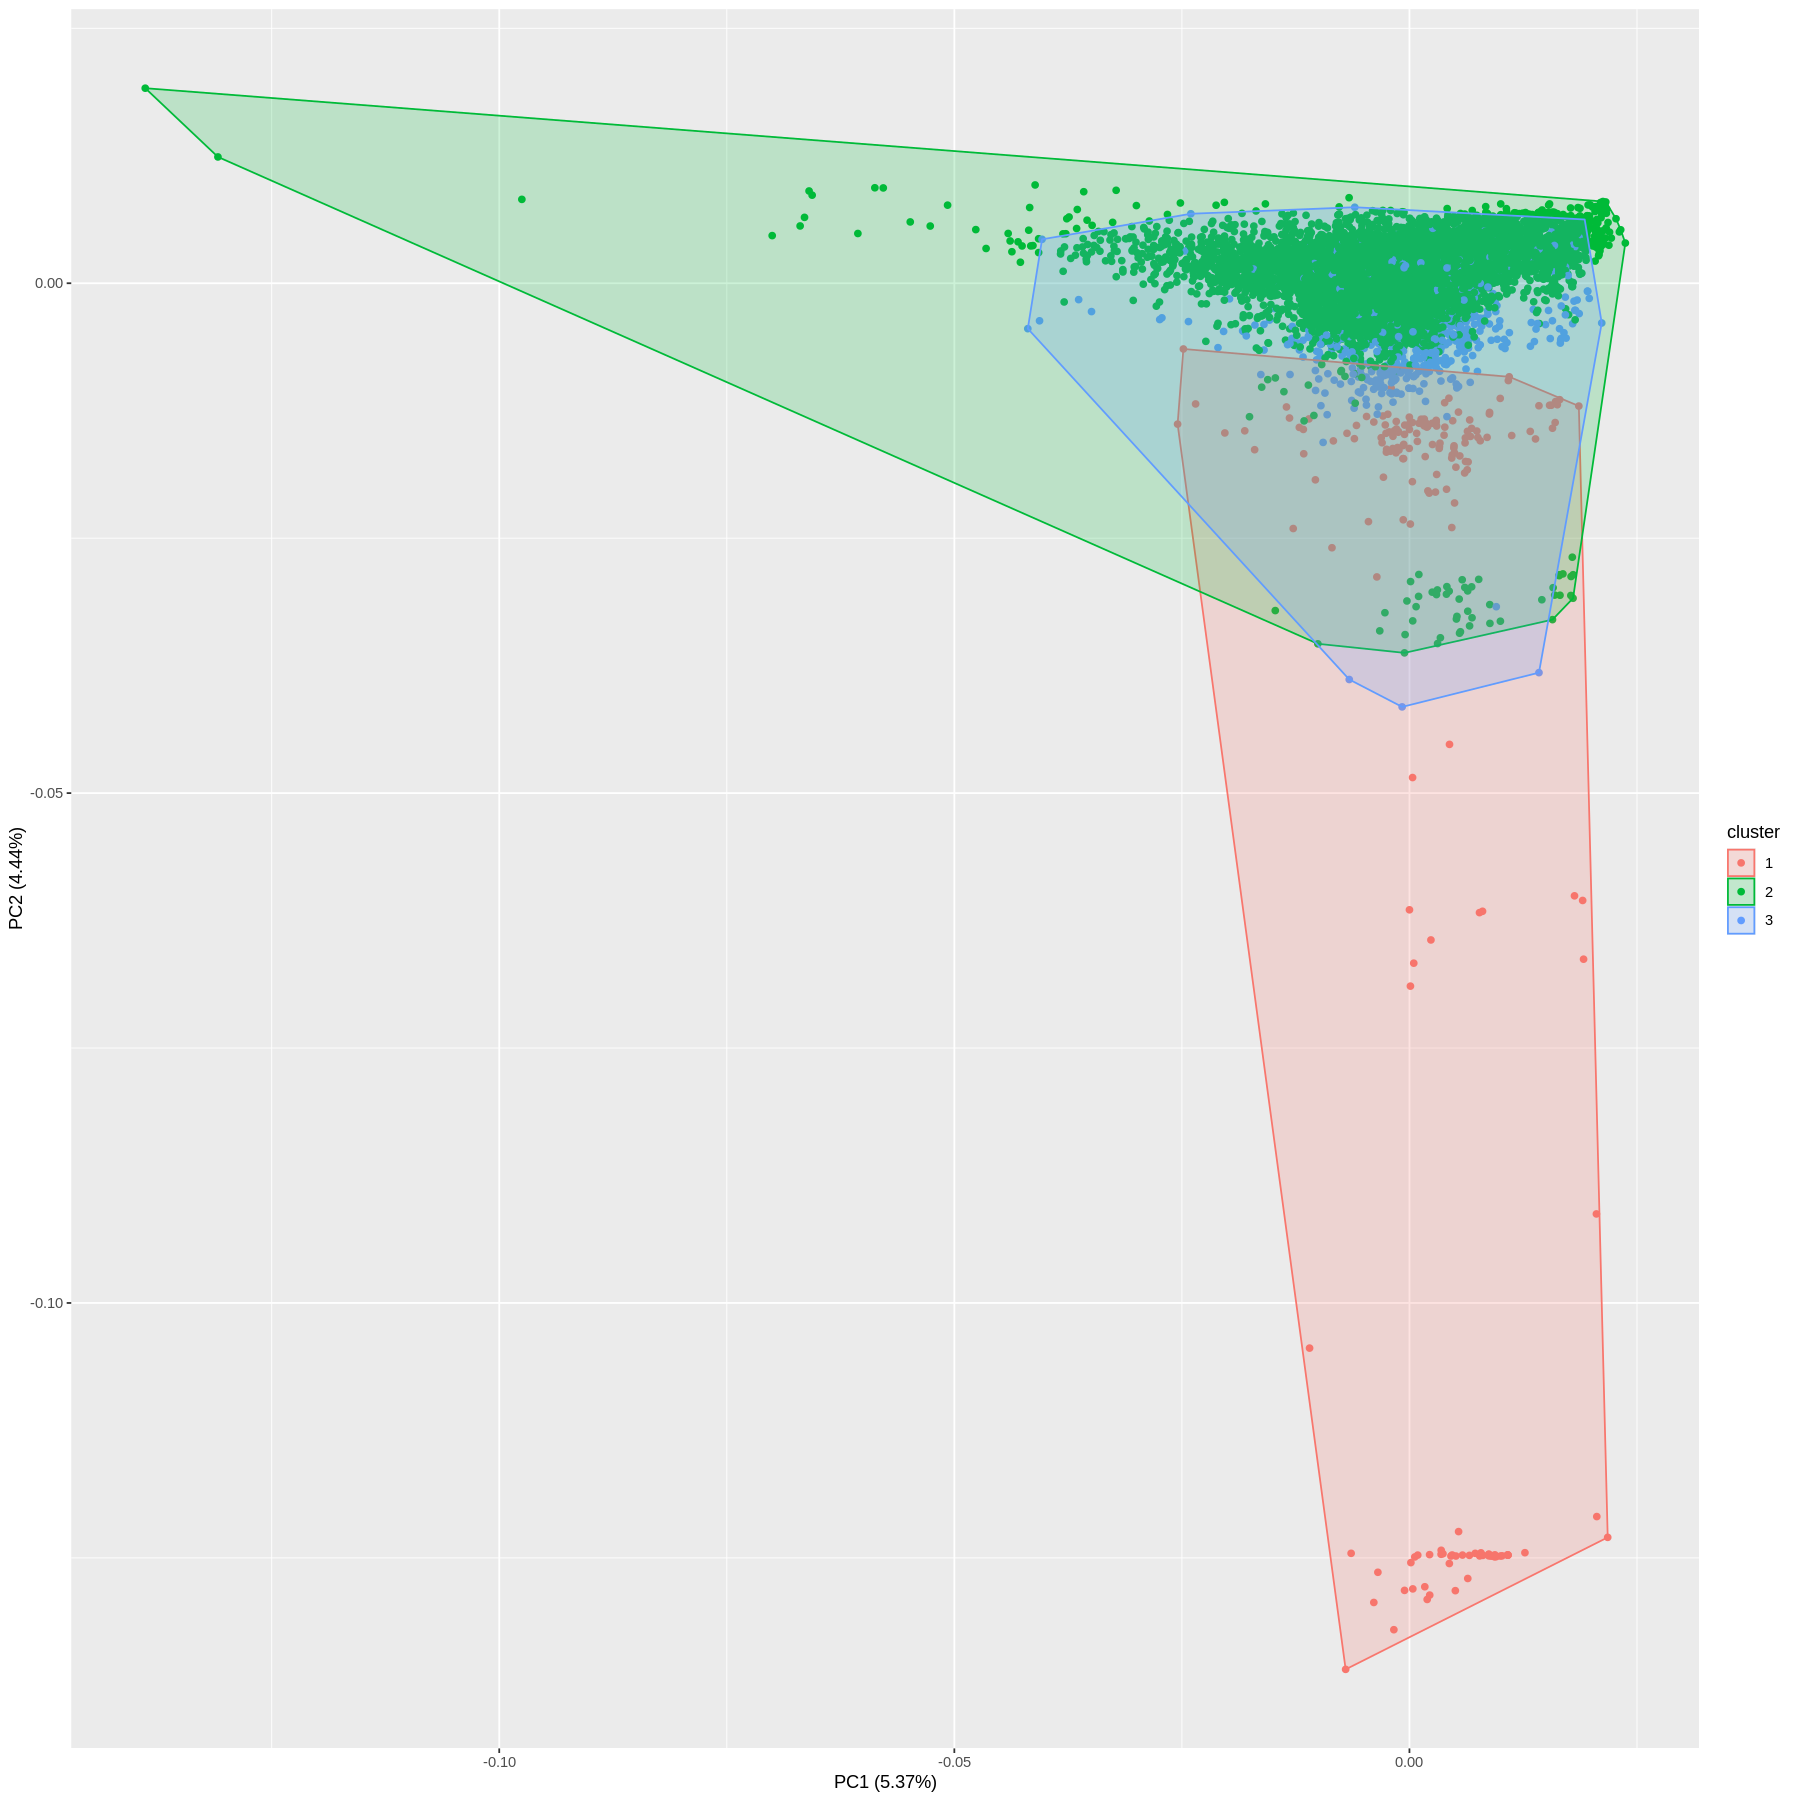

In [59]:
# Cluster plot
library(ggfortify)
options(repr.plot.width = 15, repr.plot.height = 15)
autoplot(KM1, shopping_transformed, frame=TRUE)

In [60]:
#  Adding the clusters to a data frame
shop_cluster1 <- data.frame(shopping_transformed,
                               cluster = as.factor(KM1$cluster)
)
head(shop_cluster1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,TrafficType.16,TrafficType.17,TrafficType.18,TrafficType.19,TrafficType.20,VisitorType.Other,VisitorType.Returning_Visitor,Weekend.TRUE,Revenue.TRUE,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6963635,-0.6289343,3.954699721,3.4273070,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,2
2,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.5955997,-0.450343788,1.2650121,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,2
3,-0.7025315,-0.4657410,-0.3988128,-0.2533417,-0.6963635,-0.6294551,3.954699721,3.4273070,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,3
4,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.6275453,0.650917089,2.1299300,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,2
5,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.4945739,-0.3020990,-0.009839437,0.1838646,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,1.8086156,-0.4305688,2
6,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.2927843,-0.5486101,-0.102577188,-0.3661929,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,2


In [61]:
# Cheking the numbers in each cluster
shop_cluster1 %>% group_by(cluster) %>% summarize(count=n())

cluster,count
<fct>,<int>
1,196
2,11327
3,676


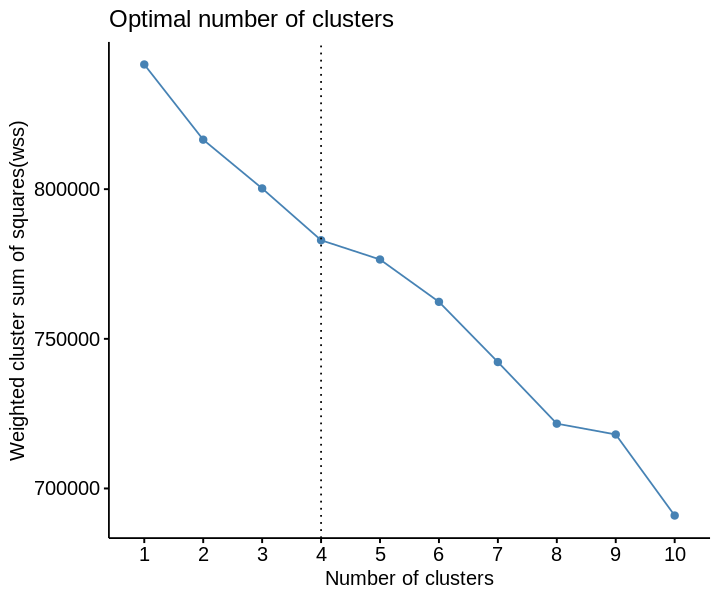

In [36]:
# Finding the optimal number of clusters using the elbow method
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_nbclust(shopping_transformed, kmeans, method = 'wss') + 
  geom_vline(xintercept = 4, linetype = 3) + 
  labs(x = 'Number of clusters', y = 'Weighted cluster sum of squares(wss)')

In [37]:
# Kmeans cluster
KM = kmeans(shopping_transformed, 4)

In [ ]:
install.packages("ggfortify")

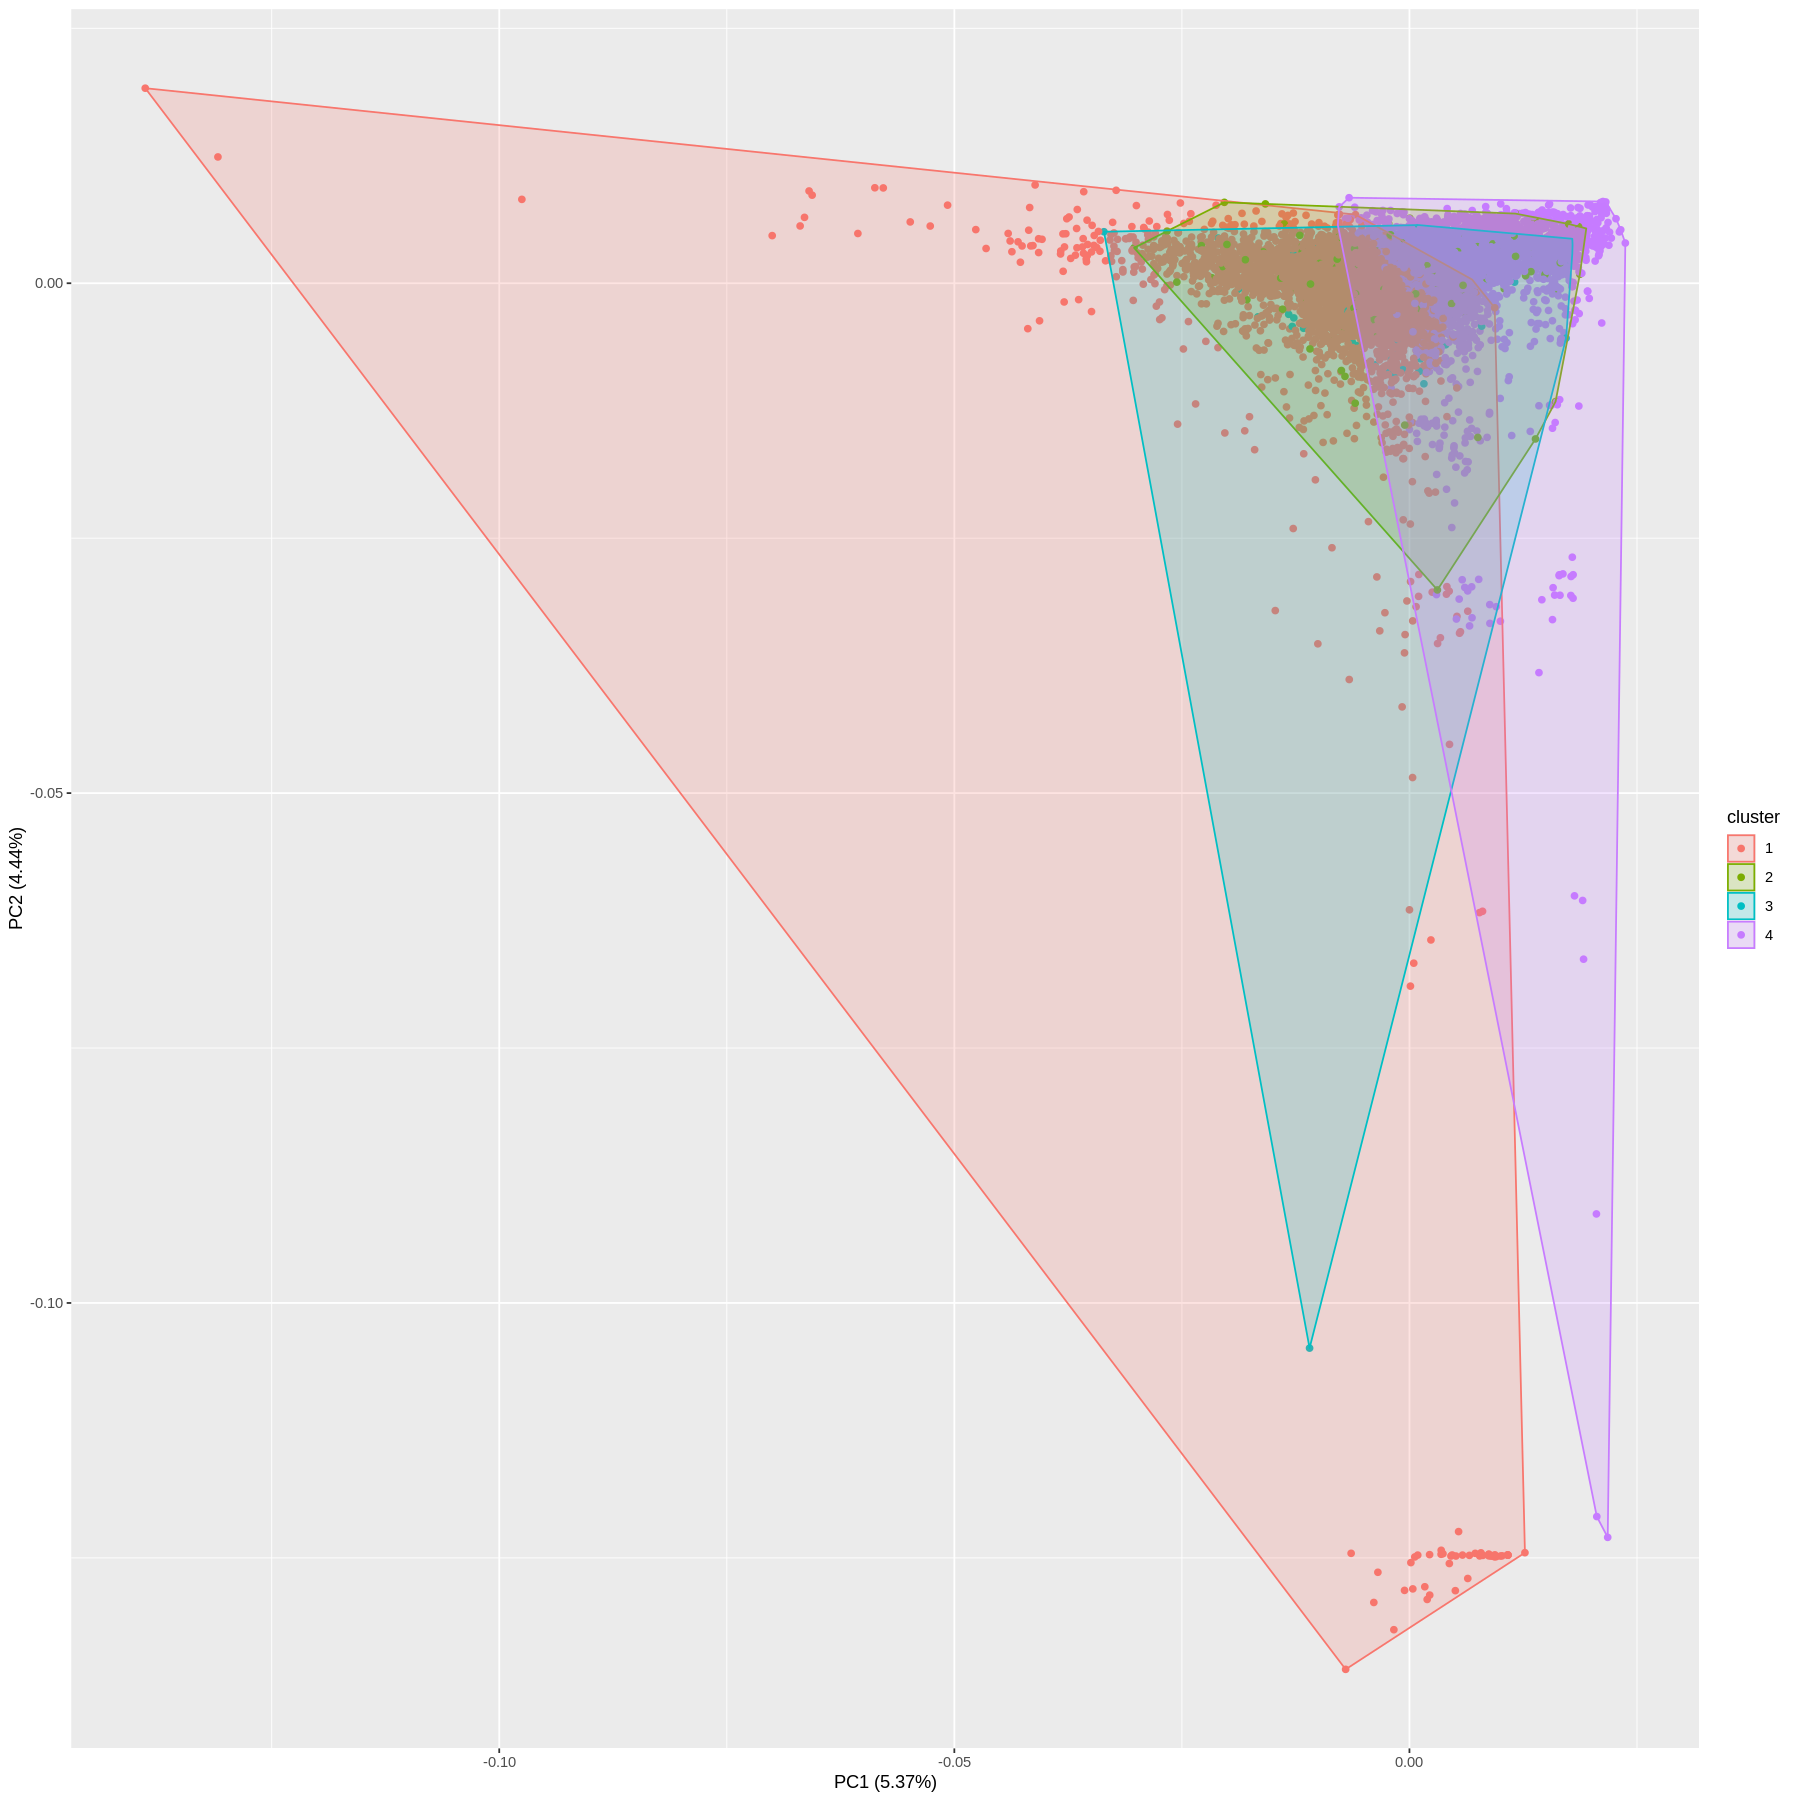

In [43]:
# Cluster plot
library(ggfortify)
options(repr.plot.width = 15, repr.plot.height = 15)
autoplot(KM, shopping_transformed, frame=TRUE)

In [44]:
#  Adding the clusters to a data frame
shop_cluster <- data.frame(shopping_transformed,
                               cluster = as.factor(KM$cluster)
)
head(shop_cluster)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,TrafficType.16,TrafficType.17,TrafficType.18,TrafficType.19,TrafficType.20,VisitorType.Other,VisitorType.Returning_Visitor,Weekend.TRUE,Revenue.TRUE,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6963635,-0.6289343,3.954699721,3.4273070,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
2,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.5955997,-0.450343788,1.2650121,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
3,-0.7025315,-0.4657410,-0.3988128,-0.2533417,-0.6963635,-0.6294551,3.954699721,3.4273070,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
4,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.6739424,-0.6275453,0.650917089,2.1299300,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4
5,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.4945739,-0.3020990,-0.009839437,0.1838646,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,1.8086156,-0.4305688,4
6,-0.7025315,-0.4601081,-0.3988128,-0.2462725,-0.2927843,-0.5486101,-0.102577188,-0.3661929,-0.3190356,-0.3103105,⋯,-0.01568318,-0.009053946,-0.02864166,-0.03735488,-0.1267832,-0.08175404,0.4124972,-0.5528638,-0.4305688,4


In [50]:
library("dplyr")

In [52]:
# Cheking the numbers in each cluster
shop_cluster %>% group_by(cluster) %>% summarize(count=n())

cluster,count
<fct>,<int>
1,5038
2,311
3,260
4,6590


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [53]:
# We will challenge the solution using heirachical clustering
#

# Heirachical

d <- dist(shopping_transformed, method = "euclidean")

In [54]:
# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

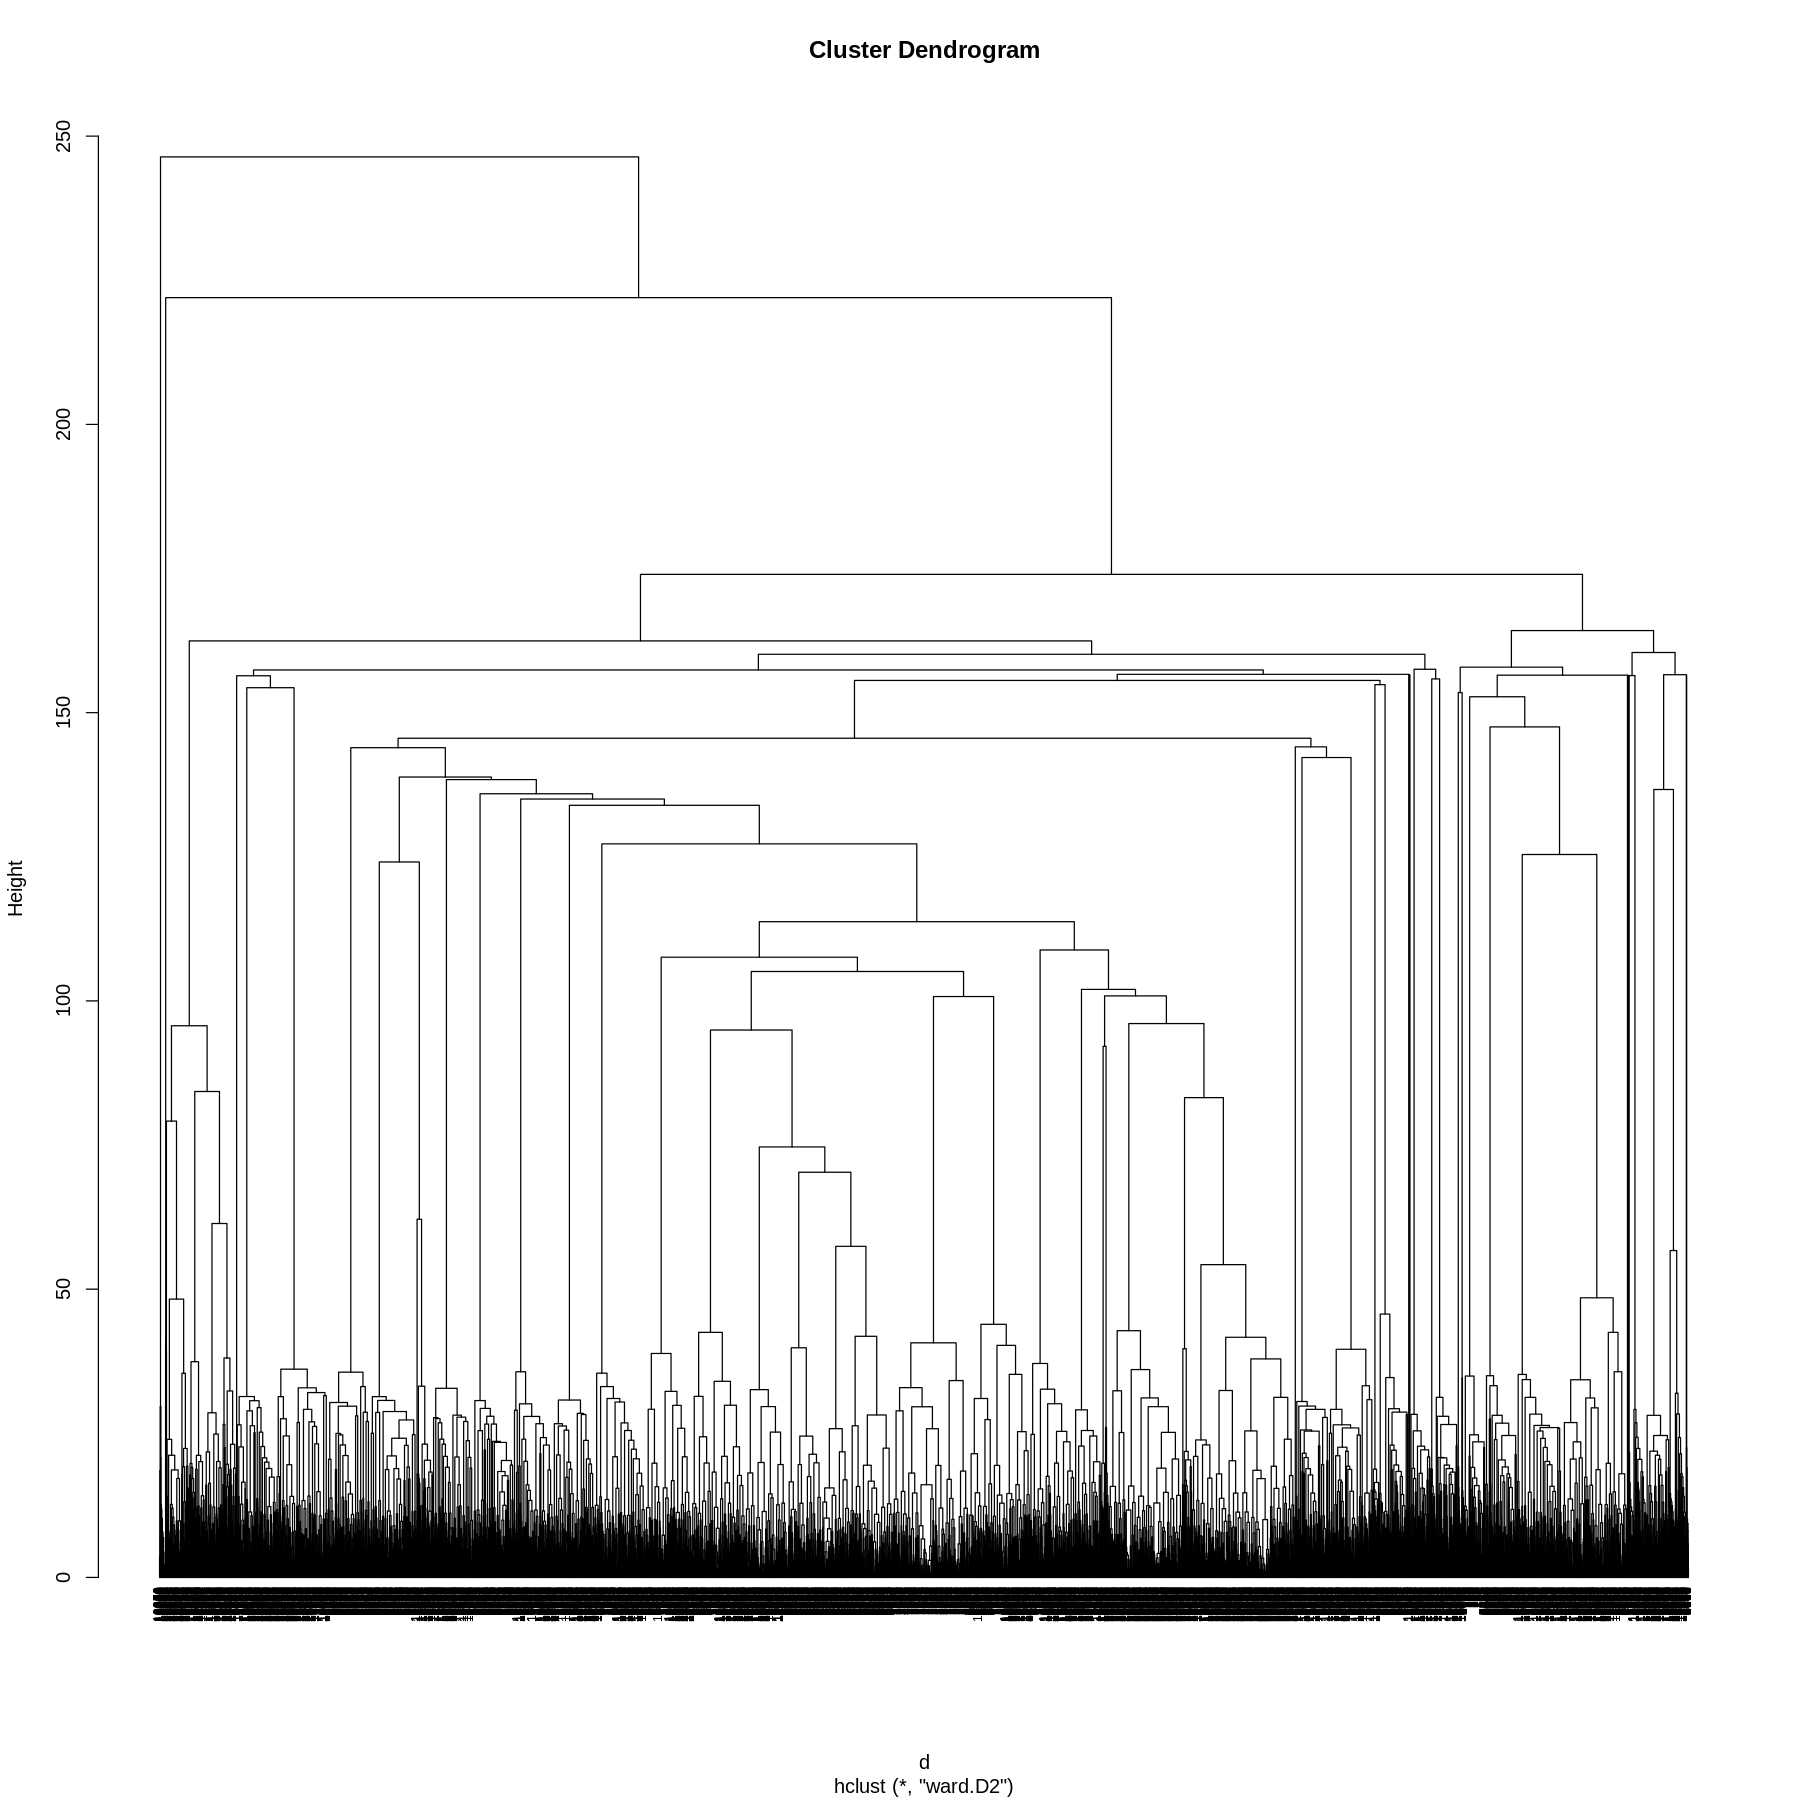

In [55]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -1)

In [56]:
# Ward's method
hc5 <- hclust(d, method = "ward.D2" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

# Number of members in each cluster
table(sub_grp)

sub_grp
    1     2     3     4 
 1844 10301    48     6 

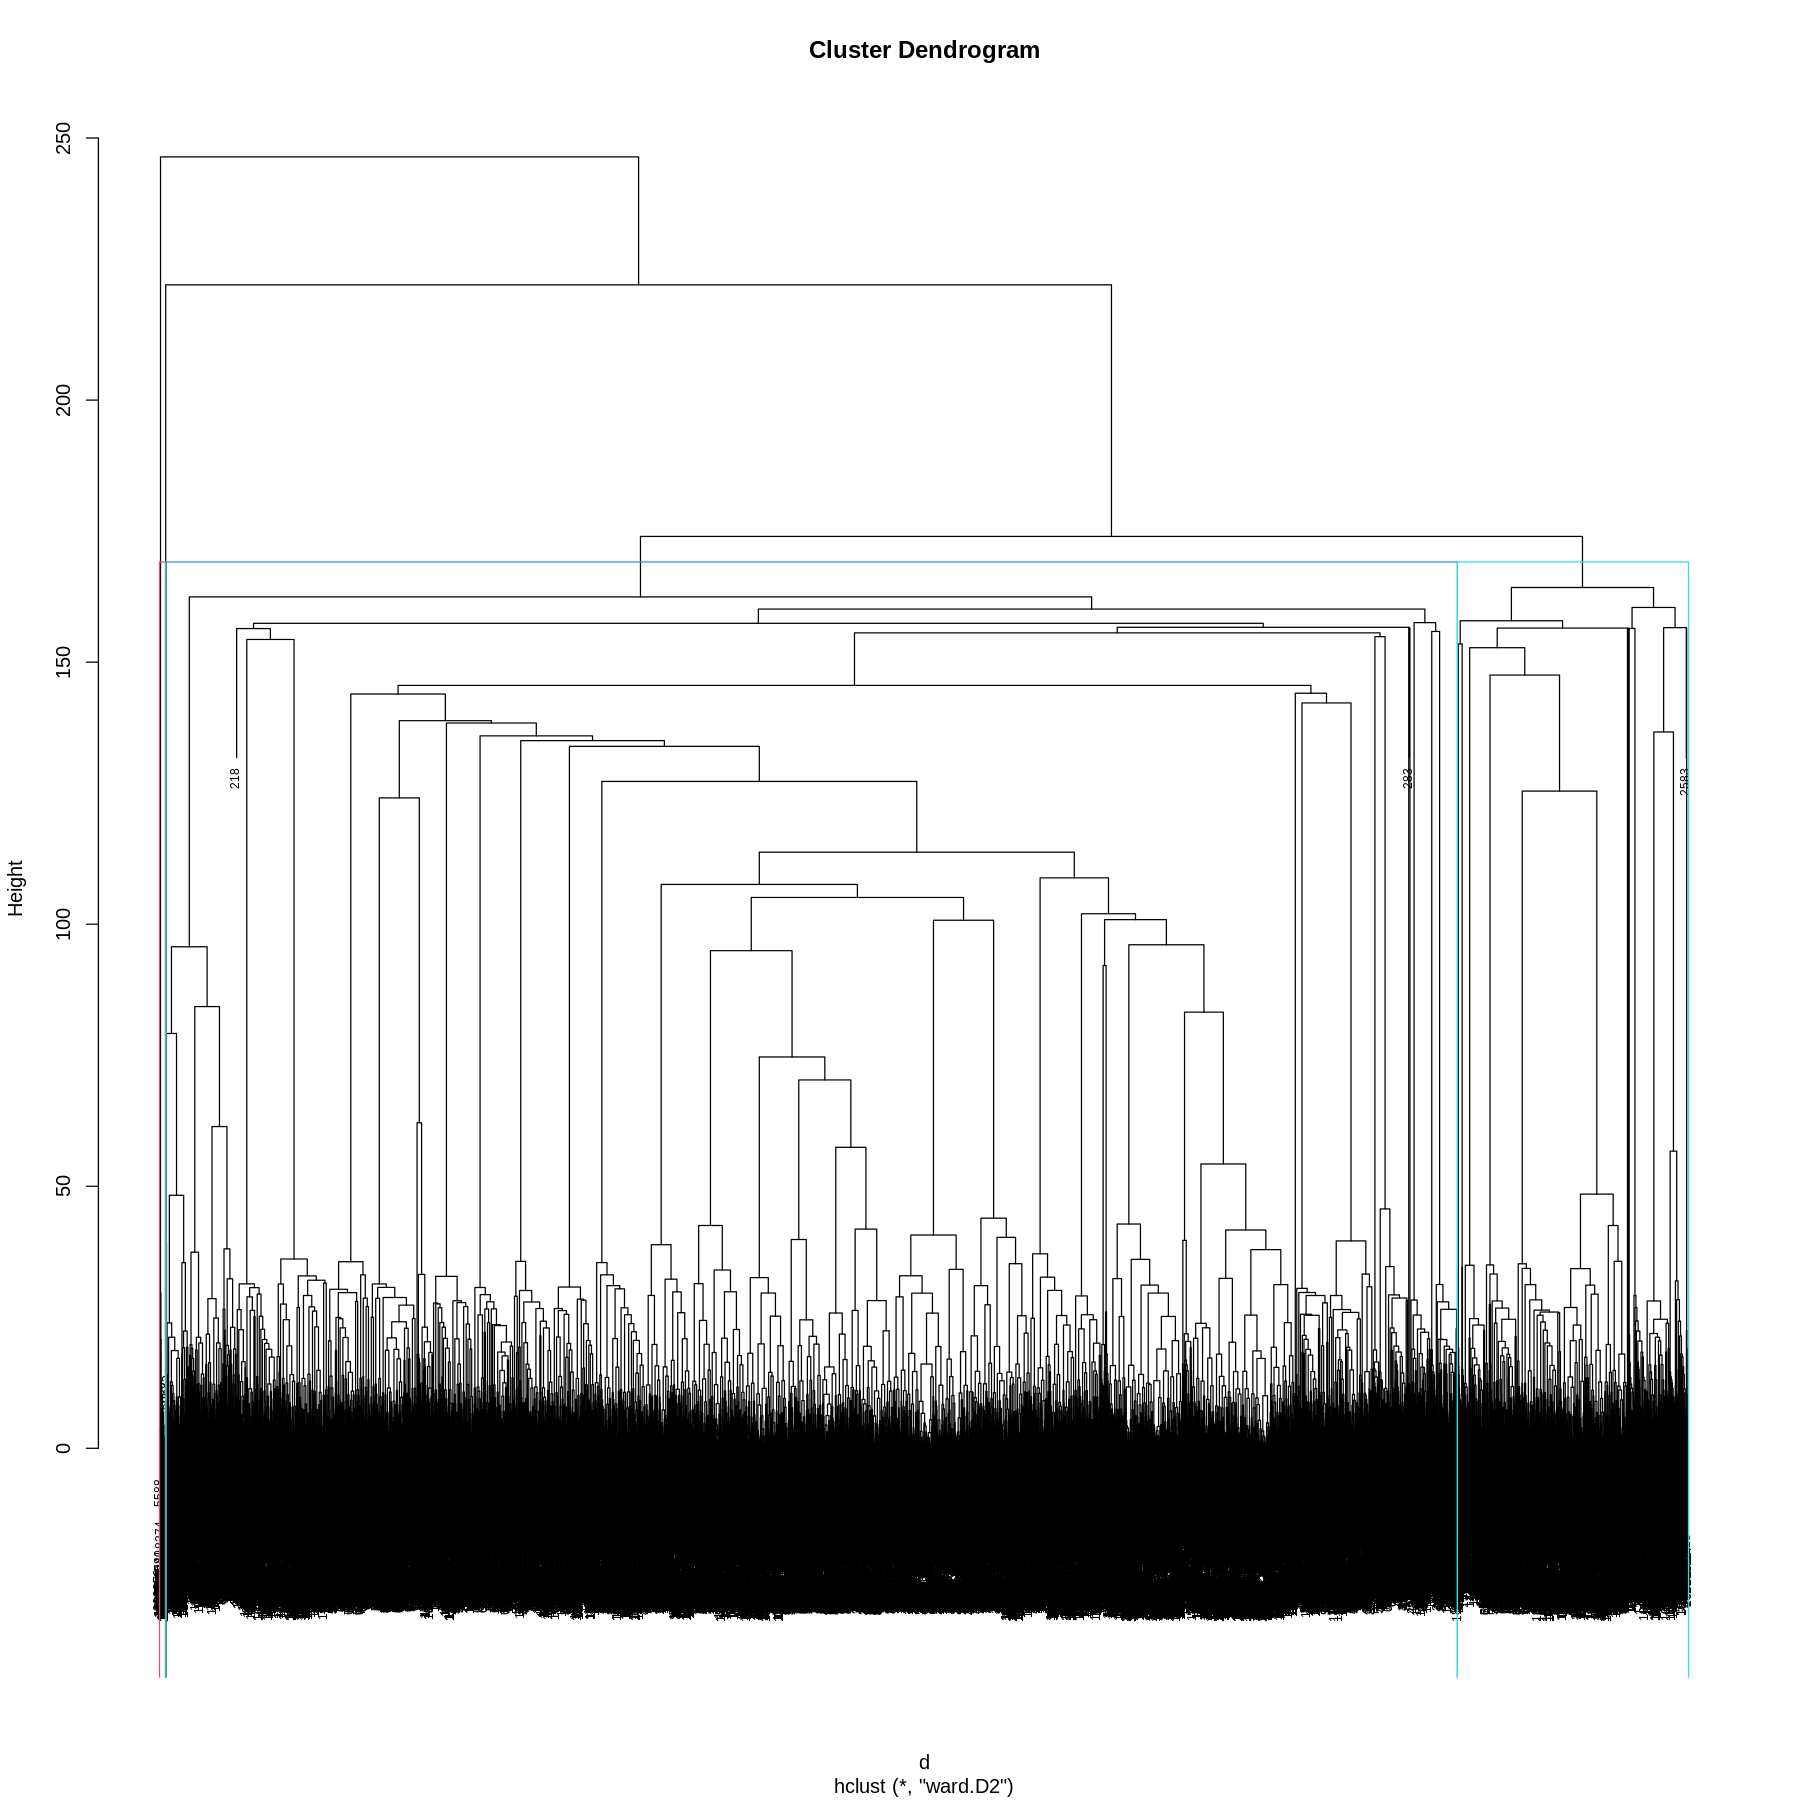

In [57]:
# Lastly, we plot the obtained dendrogram
# ---

plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4, border = 2:5)

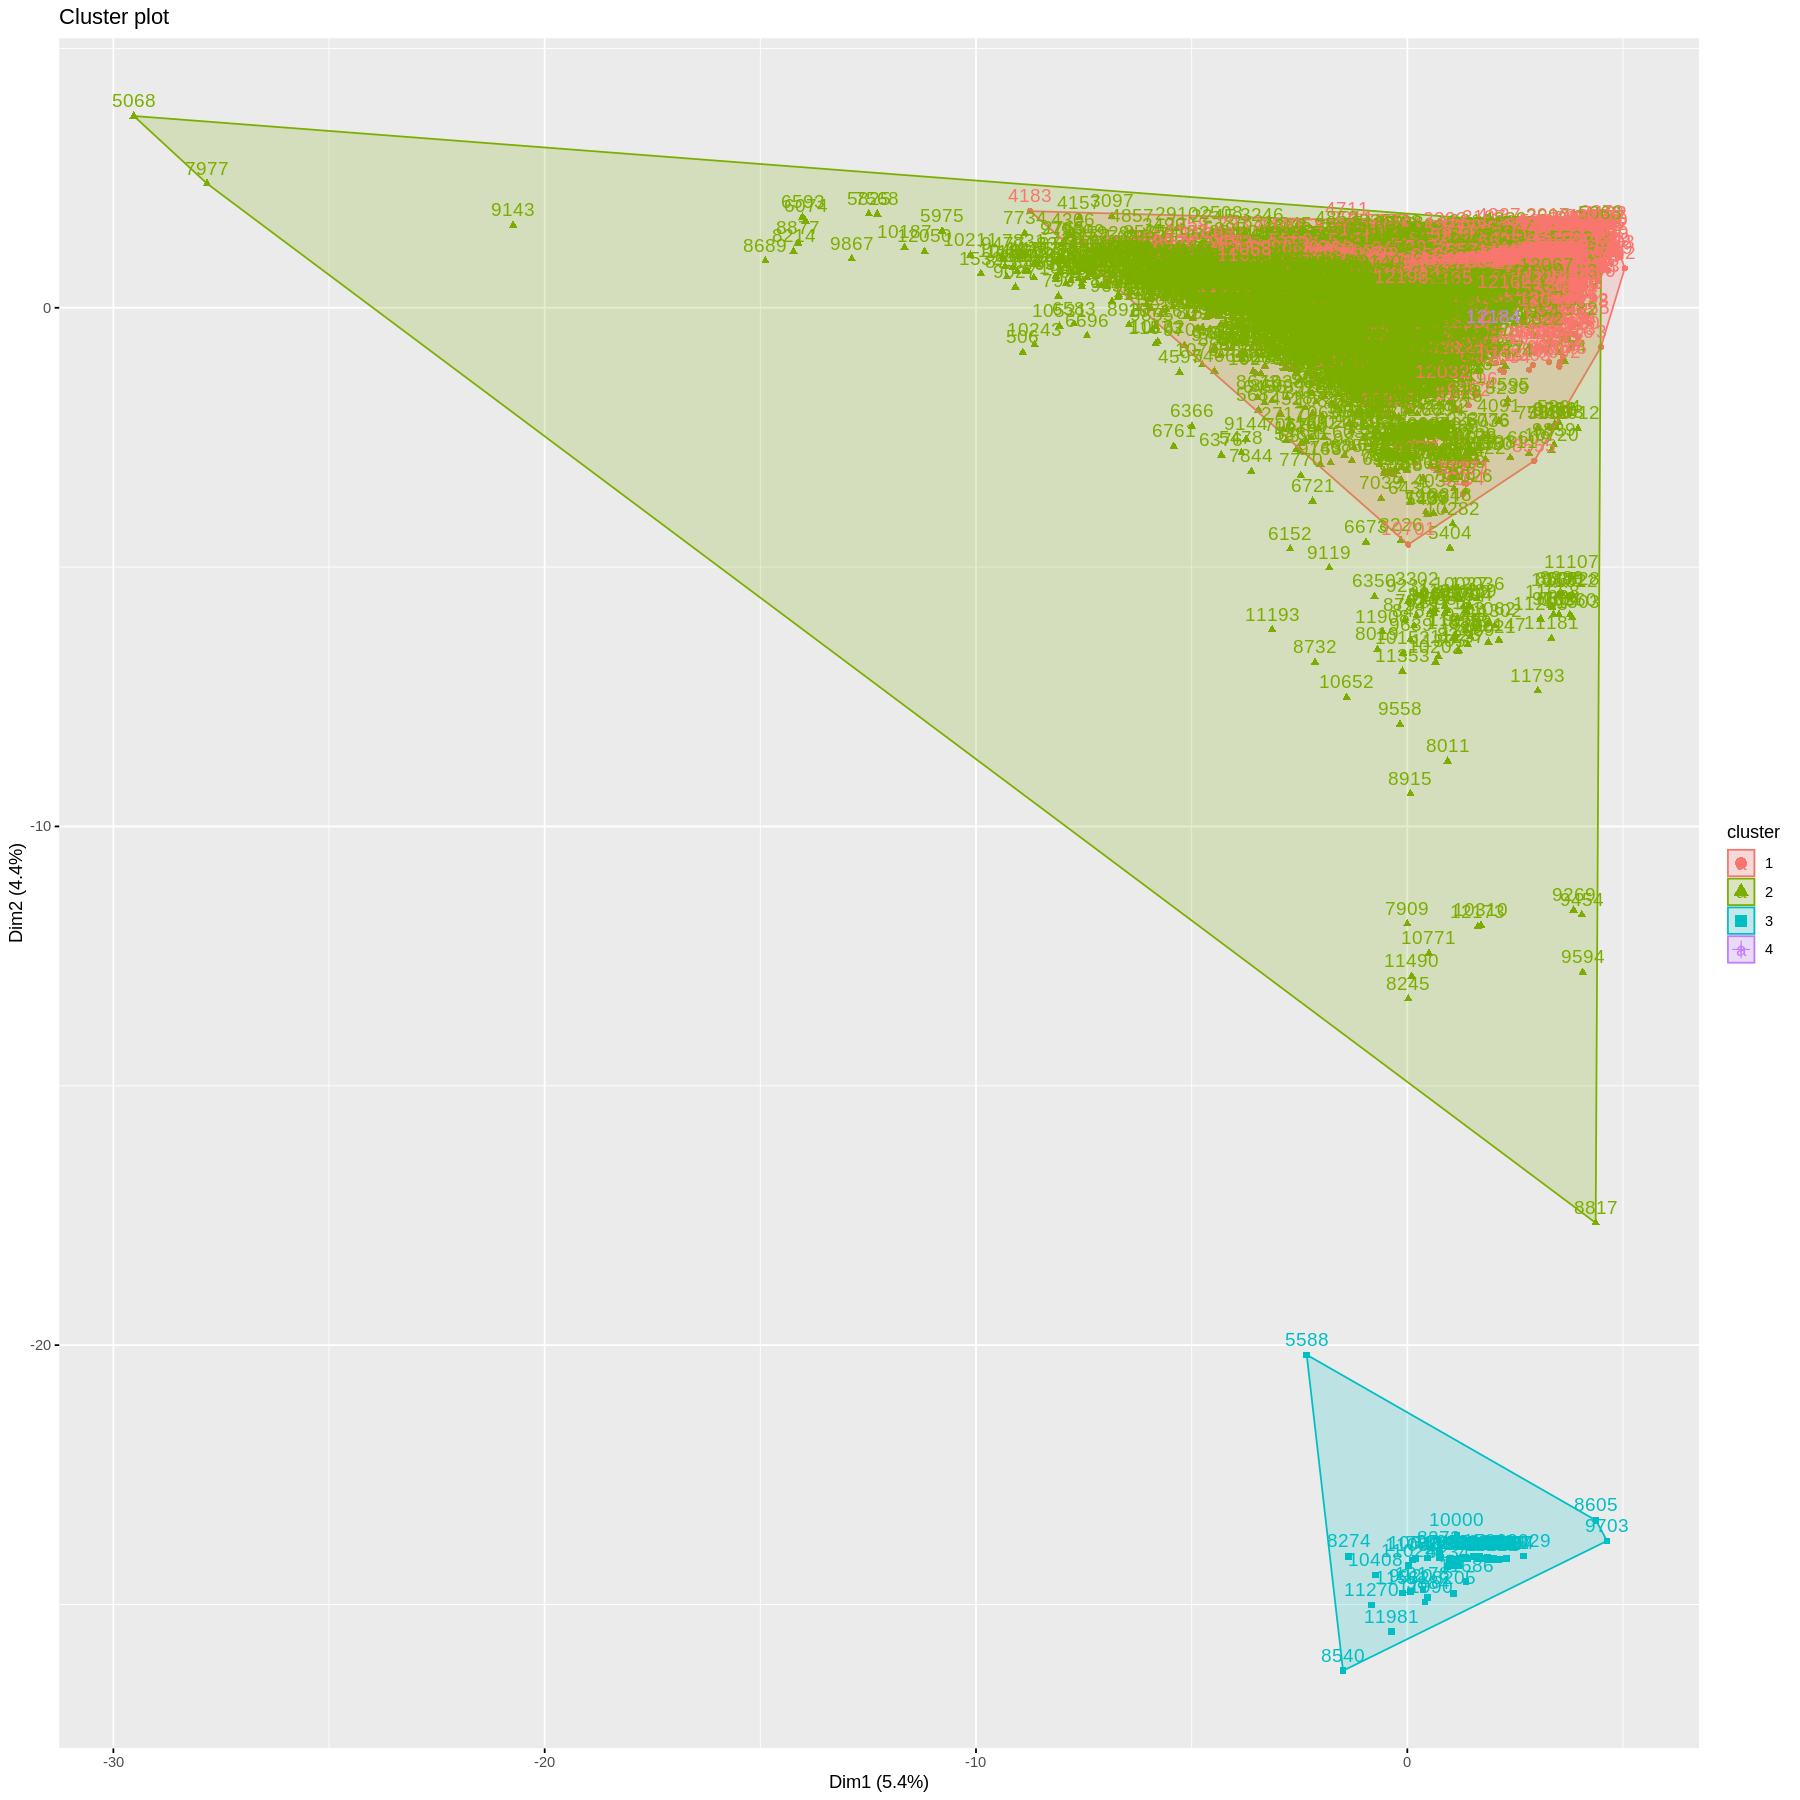

In [66]:
fviz_cluster(list(data = shopping_transformed, cluster = sub_grp))

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes we did.

### b). Do we need other data to answer our question?

### c). Did we have the right question?

The research question was right.

# Conclusions 

> - Outliers made some sense since we are investigating a whole scope of different shoppers, therefore not dropped.
- We’d recommend adding additional variables and collecting more observation so that we’re better able analyze and predict shoppers’ intentions.
- March, May and Nov are most active months.
- Operating system 2 is most popular, it should be discovered why and what type of system it is to target those users more.
- Returning visitors are more on the site.
- Oct had the highest revenue.
- Weekends seem to attract more revenue.
- Kmeans clustering with four clusters seems to work better than heirachical with 4 , however the plot for clusters in heirachical seems accurate enough.